# Research Question 3 
What are the areas of high energy usage, anomalies, and potential inefficiencies within the University Flats systems, and how can energy consumption be accurately predicted by considering weather conditions and specific temporal factors such as day of the week and month?


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Feature Selection - Energy Consumption Dataset

# METHOD - SelectKBest, f_regression - Energy dataset

In [19]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Convert 'Date' to datetime and extract day and month as potential features
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayOfWeek'] = energy_data['Date'].dt.dayofweek
energy_data['Month'] = energy_data['Date'].dt.month

# One-hot encode the categorical columns
categorical_columns = ['Flats Category', 'Periods', 'Seasons']
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = one_hot_encoder.fit_transform(energy_data[categorical_columns])

# Create a DataFrame with the encoded features
encoded_features = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the original dataframe
energy_data_encoded = pd.concat([energy_data, encoded_features], axis=1)

# Drop the original categorical columns and the identifiers from the dataframe
columns_to_drop = categorical_columns + ['Smart Meter Id', 'Address', 'Street', 'Building Name', 'Building Code', 'Date']
energy_data_final = energy_data_encoded.drop(columns=columns_to_drop)

# Define the target variable and input features
y = energy_data_final['TotaldailyenergyConsumption']
X = energy_data_final.drop('TotaldailyenergyConsumption', axis=1)

# Use SelectKBest to select the most influential features
k = 'all'  # Using 'all' to select all features for comparison
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Combine the scores with the column names
features_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sort the dataframe by score in descending order for better visualization
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Print the sorted features with their scores
print(features_scores_df.reset_index(drop=True))


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                               Feature          Score
0                              8.00 PM  479995.304626
1                              7.00 PM  476252.413388
2                              6.00 PM  454611.934931
3                              9.00 PM  435474.773298
4                              5.00 PM  409163.179510
5                             10.00 PM  396408.652146
6                             10.00 AM  380666.722581
7                             11.00 AM  369806.067870
8                             12.00 PM  367015.883870
9                              9.00 AM  353967.322033
10                             1.00 PM  352557.054056
11                             4.00 PM  343464.596287
12                            12.00 AM  338487.393308
13                            11.00 PM  333145.064994
14                             8.00 AM  330432.836899
15                             2.00 PM  326110.976411
16                             1.00 AM  321879.809252
17                          

# Feature Selection -Weather Dataset

# METHOD  - SelectKBest, f_regression

C:\Users\HP\AppData\Local\Temp\ipykernel_8372\1717955769.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)


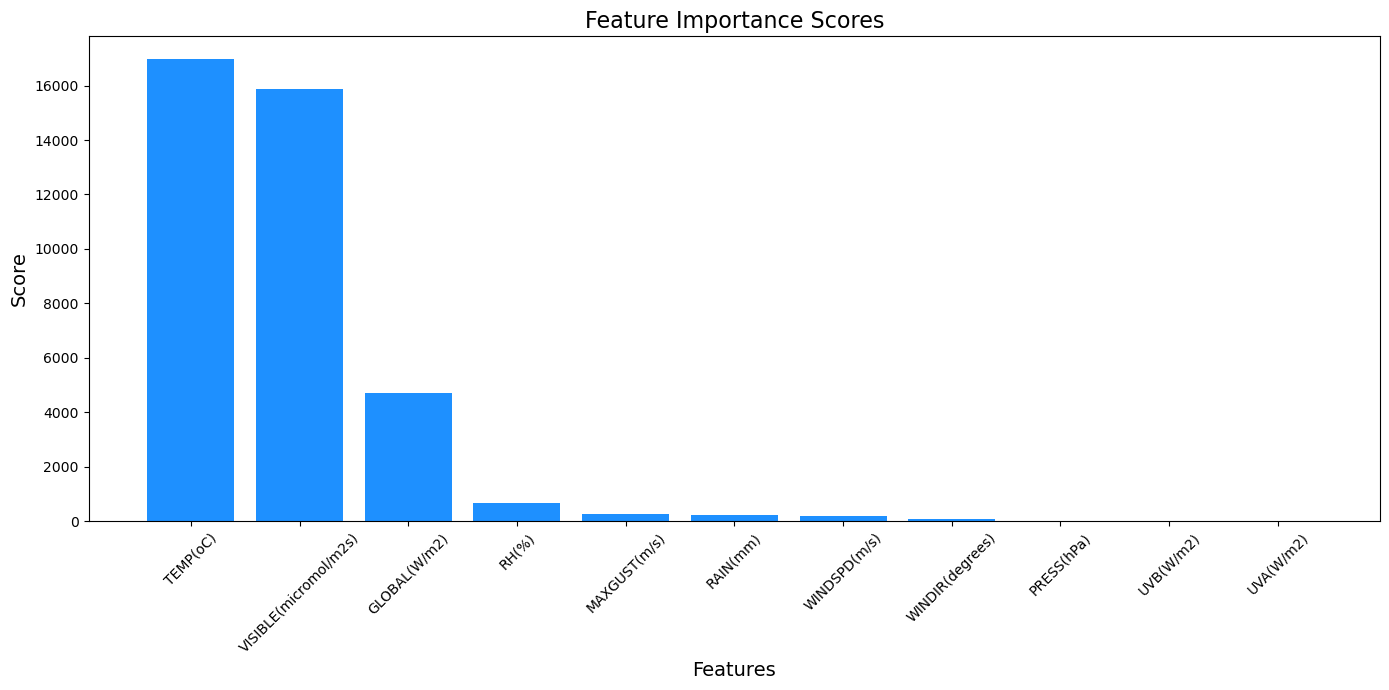


Feature Importance Scores:
                  Feature         Score
0                TEMP(oC)  1.696166e+04
1                   RH(%)  6.626112e+02
2            WINDSPD(m/s)  1.759267e+02
3         WINDIR(degrees)  7.347313e+01
4            GLOBAL(W/m2)  4.722089e+03
5               UVA(W/m2)  0.000000e+00
6               UVB(W/m2)  1.615519e-16
7   VISIBLE(micromol/m2s)  1.588101e+04
8                RAIN(mm)  2.064613e+02
9              PRESS(hPa)  1.880367e+01
10           MAXGUST(m/s)  2.487382e+02


In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the energy dataset
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Assuming the 'DATE(dd/mm/yy)' and 'TIME' columns in the weather dataset are named as such
# and replacing '.' with ':' in the 'TIME' column to correct the format
weather_data['TIME'] = weather_data['TIME'].str.replace('.', ':', regex=False)
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)

# Assuming the time format is like '1:00 PM' or '01:00 AM'
time_format = '%d/%m/%Y %I:%M %p'  # Use '%H:%M' if your time is in 24-hour format

# Then parse the datetime with the explicit format
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.replace('.', ':', regex=False), format=time_format)


# Merge the datasets on the datetime columns
# This assumes that the weather_data has already been aggregated to daily data to match the energy_data frequency
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime', how='left')

# Select the target variable from the energy dataset
y = merged_data['TotaldailyenergyConsumption']

# Select features from the weather dataset
X_weather = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']].dropna()

# Use SelectKBest to select the most influential weather features
k = 'all'  # Use 'all' to select all features, you can set this to any number if you want to reduce the number of features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_weather, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Combine the scores with the column names
features_scores_df = pd.DataFrame({'Feature': X_weather.columns, 'Score': feature_scores})

# Sort the dataframe by score in descending order for better visualization
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 7))
plt.bar(features_scores_df['Feature'], features_scores_df['Score'], color='dodgerblue')

# Add labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Feature Importance Scores', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

#################################

# Get the scores for each feature
#feature_scores = selector.scores_

# Combine the scores with the column names
features_scores_df = pd.DataFrame({'Feature': X_weather.columns, 'Score': feature_scores})

# Print the feature scores
print("\nFeature Importance Scores:")
print(features_scores_df)


# Comments 
The feature importance scores from the regression analysis suggest that temperature and visible light intensity are the most significant predictors of daily energy consumption. Global radiation holds some importance, albeit less than temperature and light. Relative humidity, wind speed, and gustiness have a moderate impact, while UV radiation and atmospheric pressure are the least influential factors. 

# Predictive Analysis

# MODEL - predict and analyze energy consumption using linear regression 

Mean Absolute Error: 4.549471280085799e-14
Mean Squared Error: 4.398003713880437e-27
R² Score: 1.0


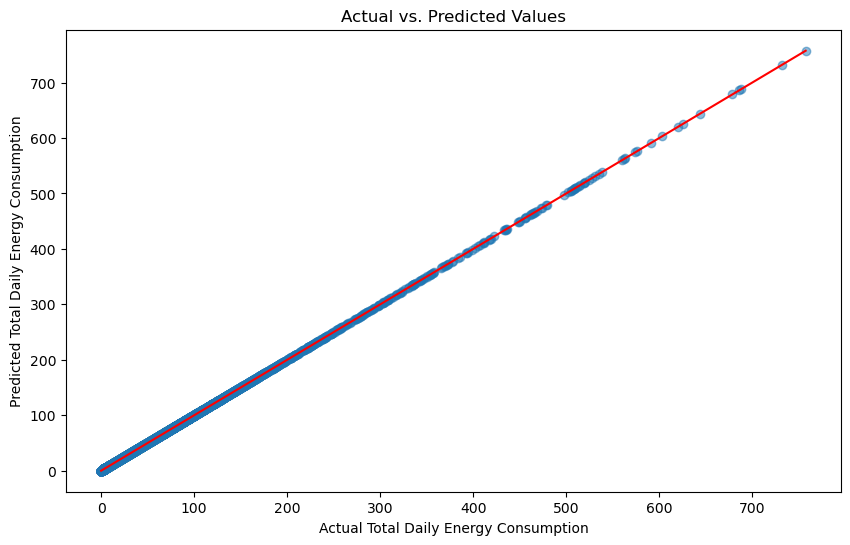

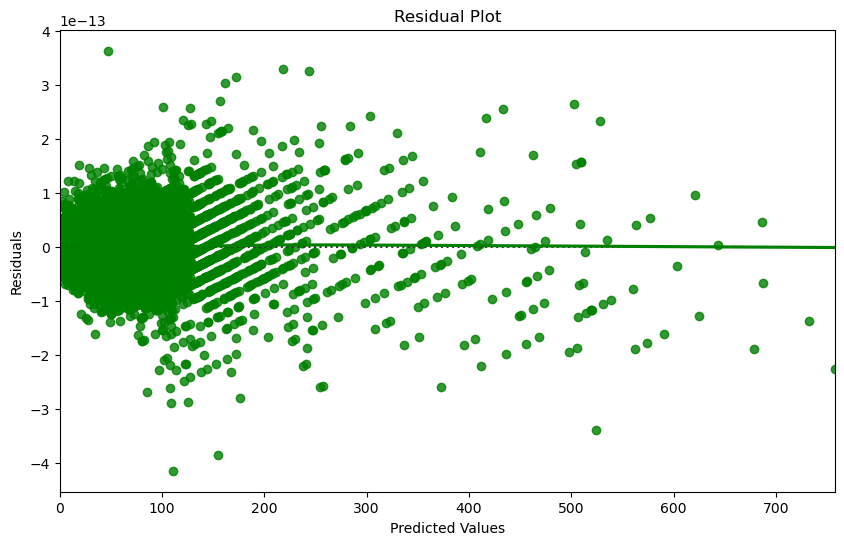

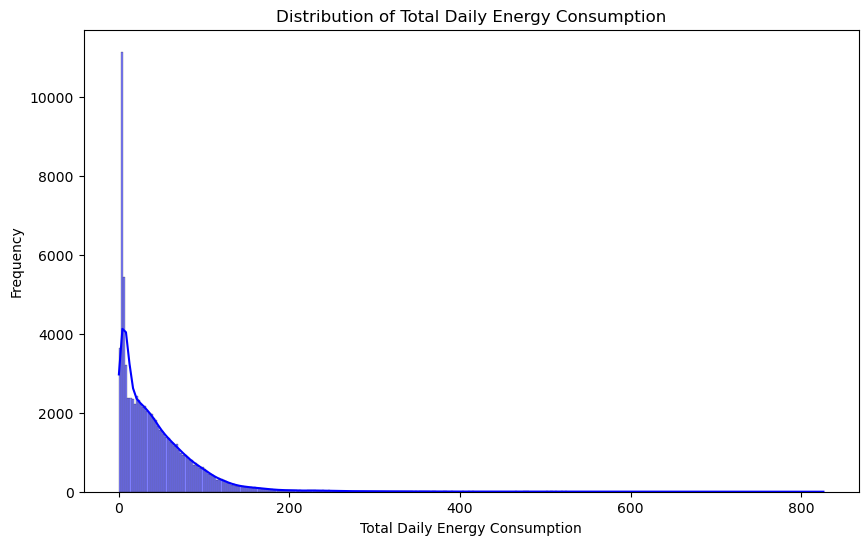

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Convert 'Date' to datetime and explicitly specify the format if needed
date_format = "%d/%m/%Y"
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format=date_format)

# Extract time-based features
energy_data['DayOfWeek'] = energy_data['Date'].dt.dayofweek
energy_data['Month'] = energy_data['Date'].dt.month

# Update and verify all categorical features list including 'Periods' or any similar feature
categorical_features = ['Flats Category', 'Seasons', 'Periods']  # Adjust this list based on actual column names
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(energy_data[categorical_features])

# Create a DataFrame with the encoded features
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded features
energy_data = pd.concat([energy_data, encoded_features_df], axis=1)
energy_data.drop(columns=categorical_features, inplace=True)

# Update the numerical features list according to actual columns in your dataset
numerical_features = ['12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM']  # Continue this list for all hourly columns as needed

# Standardize or normalize numerical features
scaler = StandardScaler()
energy_data[numerical_features] = scaler.fit_transform(energy_data[numerical_features])

# Define your features matrix X and target variable y
excluded_columns = ['TotaldailyenergyConsumption', 'Smart Meter Id', 'Address', 'Street', 'Building Name', 'Building Code', 'Date']  # Exclude non-relevant columns
X = energy_data.drop(columns=excluded_columns)
y = energy_data['TotaldailyenergyConsumption']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization of the model's performance

# 1. Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Total Daily Energy Consumption')
plt.ylabel('Predicted Total Daily Energy Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line showing perfect predictions
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Histogram of the Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribution of Total Daily Energy Consumption')
plt.xlabel('Total Daily Energy Consumption')
plt.ylabel('Frequency')
plt.show()


# Regression Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_1244\3933215564.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


University Flats - TEMP(oC): Coef: -5.011633949529766, Intercept: 101.20132548874, R^2: 0.14546972365642097
Residential College - TEMP(oC): Coef: -6.791933182588868, Intercept: 129.03429294946966, R^2: 0.19085775420198225
University Flats - RH(%): Coef: -0.360166583297405, Intercept: 69.9143359130324, R^2: 0.006784891860464715
Residential College - RH(%): Coef: -0.48556913032889554, Intercept: 86.44014405960894, R^2: 0.008809419821407372
University Flats - WINDSPD(m/s): Coef: 1.3996391949084044, Intercept: 39.04238909034622, R^2: 0.0017830151173167108
Residential College - WINDSPD(m/s): Coef: 1.916677568131447, Intercept: 44.74461386346808, R^2: 0.0023885262853273748
University Flats - WINDIR(degrees): Coef: 0.014610546190448723, Intercept: 39.97284602100536, R^2: 0.0007266302524011614
Residential College - WINDIR(degrees): Coef: 0.020514362999040747, Intercept: 45.9291964186871, R^2: 0.001023306458354356
University Flats - GLOBAL(W/m2): Coef: 353.1917668948297, Intercept: -244.4959235

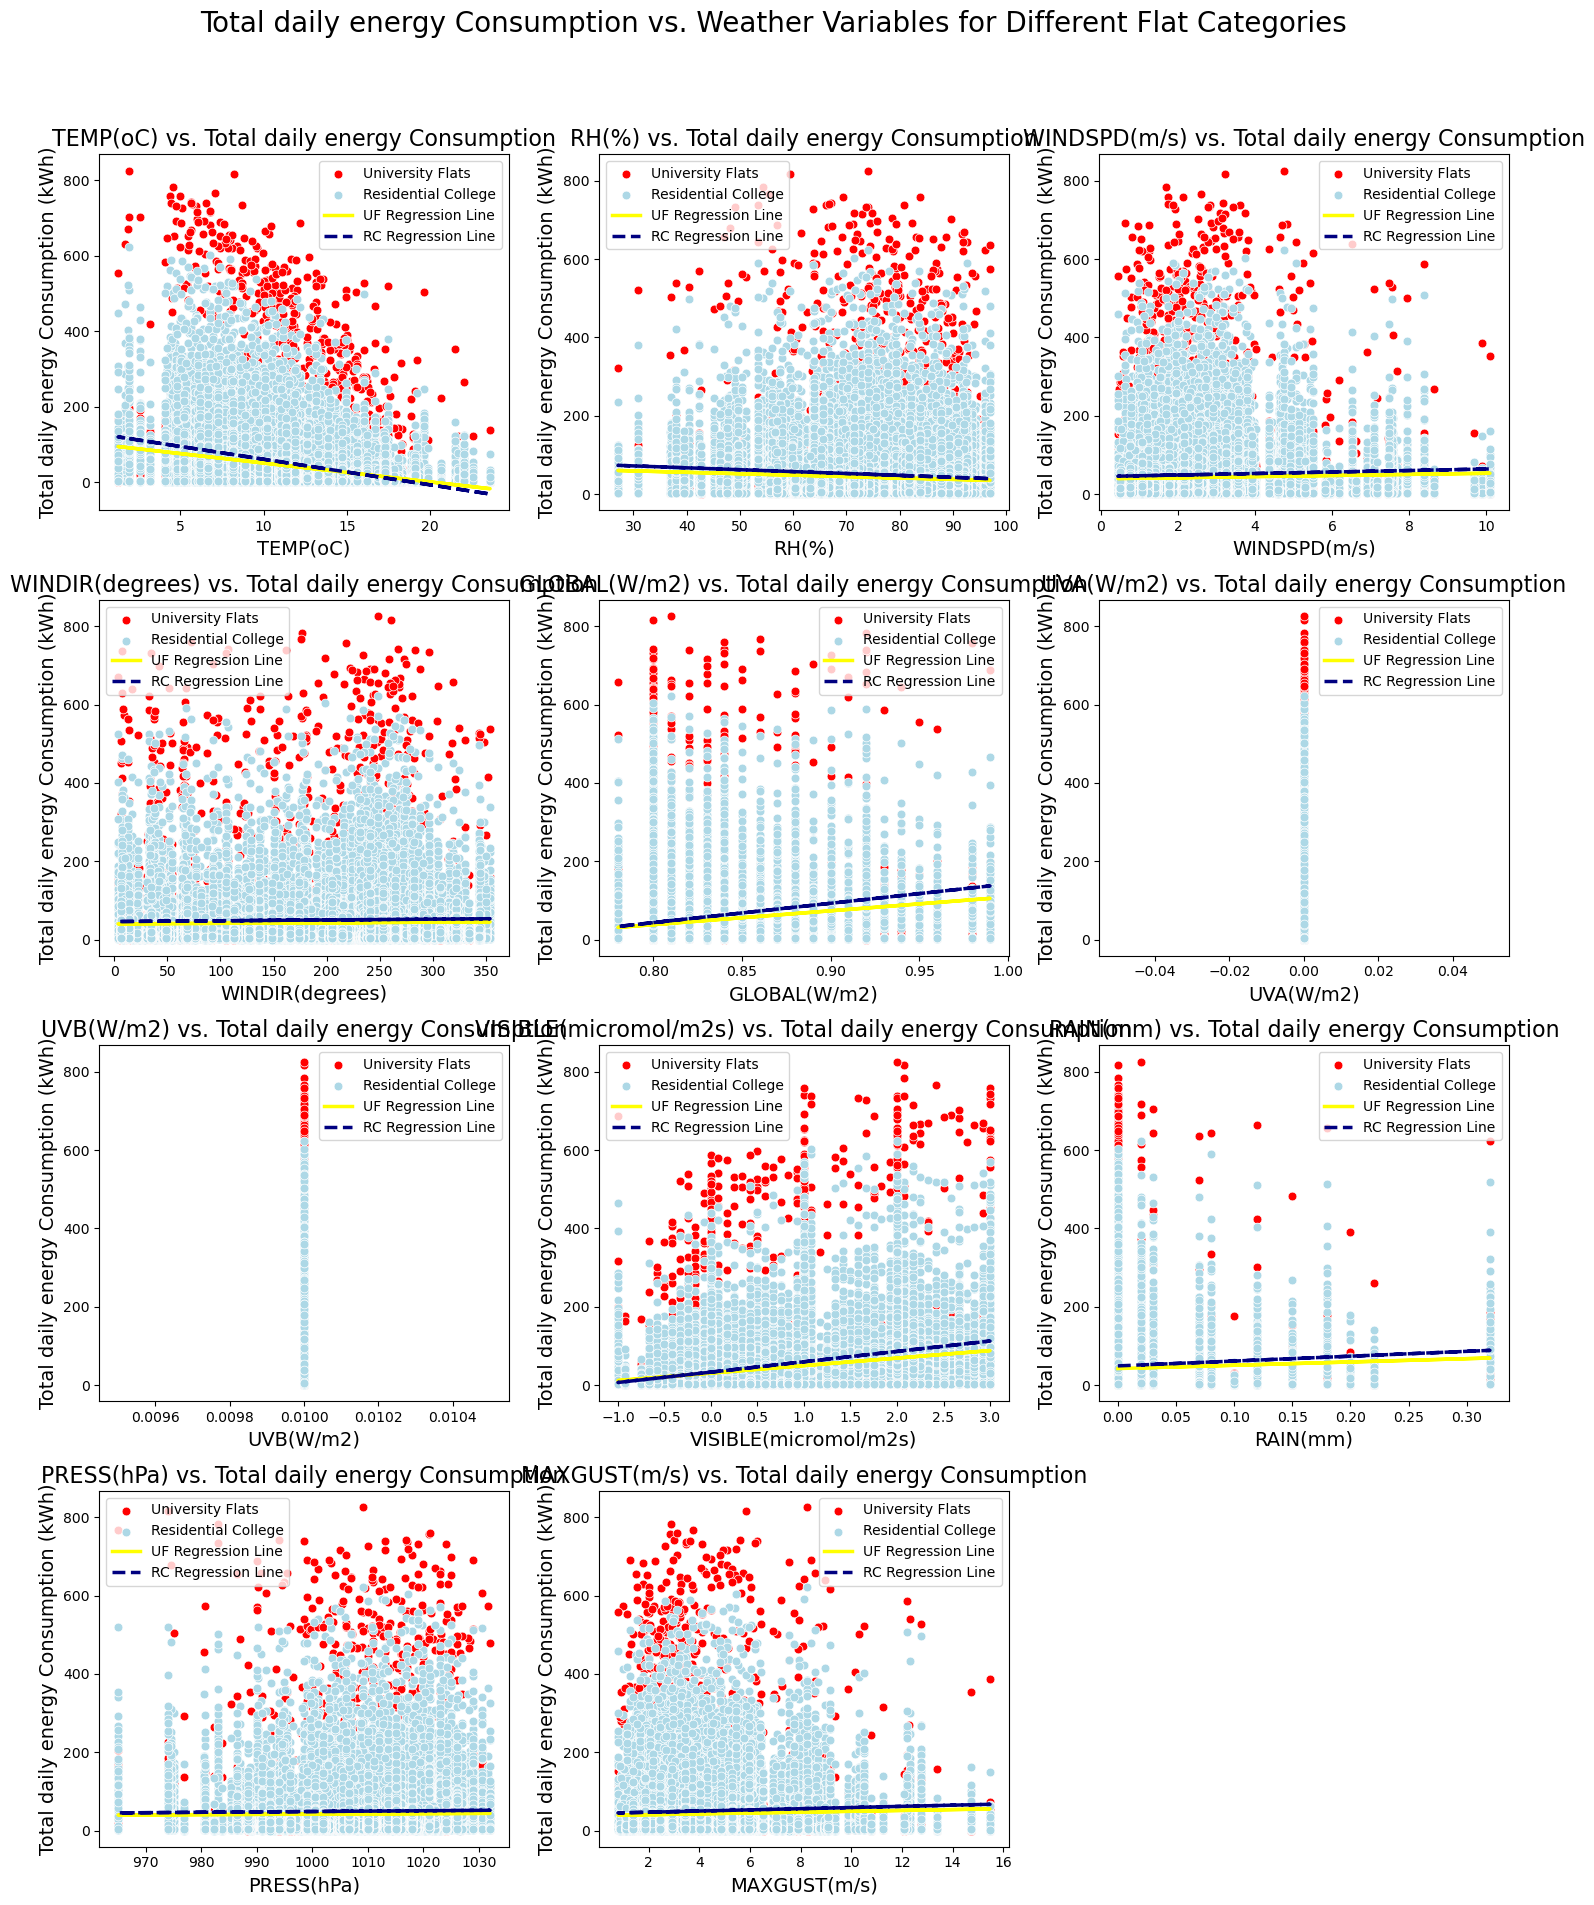

In [13]:
# Test
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Separate the data based on 'Flats Category'
university_flats = merged_data[merged_data['Flats Category'] == 'University Flats']
residential_college = merged_data[merged_data['Flats Category'] == 'Residential College']

# Selected weather variables for analysis
selected_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Create a grid of subplots with 3 columns and 4 rows
fig, axs = plt.subplots(4, 3, figsize=(15, 20))  # Adjusted for 3 columns and 4 rows
axs = axs.flatten()

# Loop through each selected weather variable and create subplots
for i, var in enumerate(selected_vars):
    # Prepare data for regression for both categories
    uf_data = university_flats[['TotaldailyenergyConsumption', var]].dropna()
    rc_data = residential_college[['TotaldailyenergyConsumption', var]].dropna()

    # Fit the model for University Flats
    linreg_uf = LinearRegression()
    X_uf = uf_data[[var]]
    y_uf = uf_data['TotaldailyenergyConsumption']
    linreg_uf.fit(X_uf, y_uf)

    # Fit the model for Residential College
    linreg_rc = LinearRegression()
    X_rc = rc_data[[var]]
    y_rc = rc_data['TotaldailyenergyConsumption']
    linreg_rc.fit(X_rc, y_rc)

    # Print the stats for University Flats
    uf_coef = linreg_uf.coef_[0]
    uf_intercept = linreg_uf.intercept_
    uf_r_squared = linreg_uf.score(X_uf, y_uf)
    print(f'University Flats - {var}: Coef: {uf_coef}, Intercept: {uf_intercept}, R^2: {uf_r_squared}')

    # Print the stats for Residential College
    rc_coef = linreg_rc.coef_[0]
    rc_intercept = linreg_rc.intercept_
    rc_r_squared = linreg_rc.score(X_rc, y_rc)
    print(f'Residential College - {var}: Coef: {rc_coef}, Intercept: {rc_intercept}, R^2: {rc_r_squared}')

    # Scatter plot with regression line in a subplot for University Flats
    sns.scatterplot(x=var, y='TotaldailyenergyConsumption', data=uf_data, ax=axs[i], color='red', s=40, label='University Flats')
    # Scatter plot with regression line in a subplot for Residential College
    sns.scatterplot(x=var, y='TotaldailyenergyConsumption', data=rc_data, ax=axs[i], color='lightblue', s=40, label='Residential College')

    # Add regression lines
    axs[i].plot(X_uf, linreg_uf.predict(X_uf), color='yellow', linewidth=2.5, label='UF Regression Line')
    axs[i].plot(X_rc, linreg_rc.predict(X_rc), color='navy', linewidth=2.5, linestyle='--', label='RC Regression Line')

    axs[i].set_title(f'{var} vs. Total daily energy Consumption', fontsize=16)
    axs[i].set_xlabel(var, fontsize=14)
    axs[i].set_ylabel('Total daily energy Consumption (kWh)', fontsize=14)
    axs[i].legend()

# Hide any unused subplots (if any)
for j in range(len(selected_vars), len(axs)):
    axs[j].axis('off')

# Add a master title to the figure
fig.suptitle('Total daily energy Consumption vs. Weather Variables for Different Flat Categories', fontsize=20)

# Adjust the layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Comments 

Temperature (TEMP): Energy consumption decreases with rising temperatures, suggesting heating is a major energy draw. University Flats show a coefficient of -5.01 and an R² of 0.1455, while Residential College has a slightly stronger relationship with a coefficient of -6.79 and an R² of 0.1909.

Relative Humidity (RH): A weak negative correlation exists for both housing types, with University Flats at a coefficient of -0.36 (R² = 0.0068) and Residential College at -0.49 (R² = 0.0088), indicating minimal impact on energy use.

Wind Speed (WINDSPD) and Direction (WINDIR): Positive but negligible correlations are observed, with coefficients of 1.40 (R² = 0.0018) for wind speed and 0.0146 (R² = 0.0007) for wind direction in University Flats, and 1.92 (R² = 0.0024) and 0.0205 (R² = 0.0010) respectively in Residential College.

Global Solar Radiation (GLOBAL): A substantial positive correlation is seen, especially in Residential College with a coefficient of 493.14 and an R² of 0.0621, compared to 353.19 and 0.0446 in University Flats, indicating a higher energy consumption during sunny conditions.

UVA and UVB Radiation: Neither type of UV radiation affects energy consumption, with coefficients of 0 and an R² of 0 for both, in both housing types.

Visible Light (VISIBLE): A positive correlation is present, with University Flats showing a coefficient of 19.13 and an R² of 0.1349, and Residential College at 26.44 and an R² of 0.1842, suggesting energy consumption for lighting is influenced by natural light availability.

Rainfall (RAIN): A very weak positive effect on energy consumption is noted, with coefficients of 84.11 (R² = 0.0019) in University Flats and 123.86 (R² = 0.0030) in Residential College.

Atmospheric Pressure (PRESS): The positive but weak correlation has coefficients of 0.063 (R² = 0.0002) for University Flats and 0.099 (R² = 0.0003) for Residential College, indicating pressure has a minimal effect on energy consumption.

Maximum Gust (MAXGUST): A slight positive correlation is seen, with coefficients of 1.08 (R² = 0.0025) for University Flats and 1.50 (R² = 0.0034) for Residential College.

These insights suggest that in these settings, temperature and sunlight significantly influence energy consumption, likely due to heating and cooling needs and lighting. In contrast, other weather variables like humidity, wind, and rainfall have a much smaller impact on energy use


# Prediction (Mean Square Error & R-squared)

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')


# Selecting all weather variables as features
weather_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 
                'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

features = merged_data[weather_vars]
target = merged_data['TotaldailyenergyConsumption']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Using the model to make a prediction based on new weather conditions
# Convert the new weather conditions to a DataFrame with appropriate column names
new_weather_conditions = pd.DataFrame([[15, 50, 3, 180, 200, 0.5, 0.05, 400, 0, 1015, 30]], 
                                      columns=weather_vars)
predicted_energy_consumption = model.predict(new_weather_conditions)
print(f'Predicted Energy Consumption: {predicted_energy_consumption[0]}')



C:\Users\HP\AppData\Local\Temp\ipykernel_1244\1359230358.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Mean Squared Error: 2529.3268057893074
R-squared: 0.19943006256722917
Predicted Energy Consumption: 12209.308743118512


# Comments

Mean Squared Error (MSE): The model has an MSE of 2529.3268, indicating the average squared difference between observed and predicted energy consumption is relatively high, suggesting potential inaccuracies in predictions.

R-squared (R²): With an R² of 0.1994, the model explains only about 19.94% of the variance in energy consumption, pointing to a weak relationship between the weather variables and energy usage.

Predicted Energy Consumption: The model predicts an energy consumption of 12,209.31 kWh for the given set of weather conditions, likely reflecting a daily estimate based on the target variable's naming convention.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Selecting all weather variables as features
weather_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 
                'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

features = merged_data[weather_vars]
target = merged_data['HourlyEnergyConsumption']  # Assuming 'HourlyEnergyConsumption' is your target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Using the model to make a prediction based on new weather conditions
# Convert the new weather conditions to a DataFrame with appropriate column names
new_weather_conditions = pd.DataFrame([[15, 50, 3, 180, 200, 0.5, 0.05, 400, 0, 1015, 30]], 
                                      columns=weather_vars)
predicted_energy_consumption = model.predict(new_weather_conditions)
print(f'Predicted Energy Consumption: {predicted_energy_consumption[0]}')


# Residual Plots 

C:\Users\HP\AppData\Local\Temp\ipykernel_1244\3466228033.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


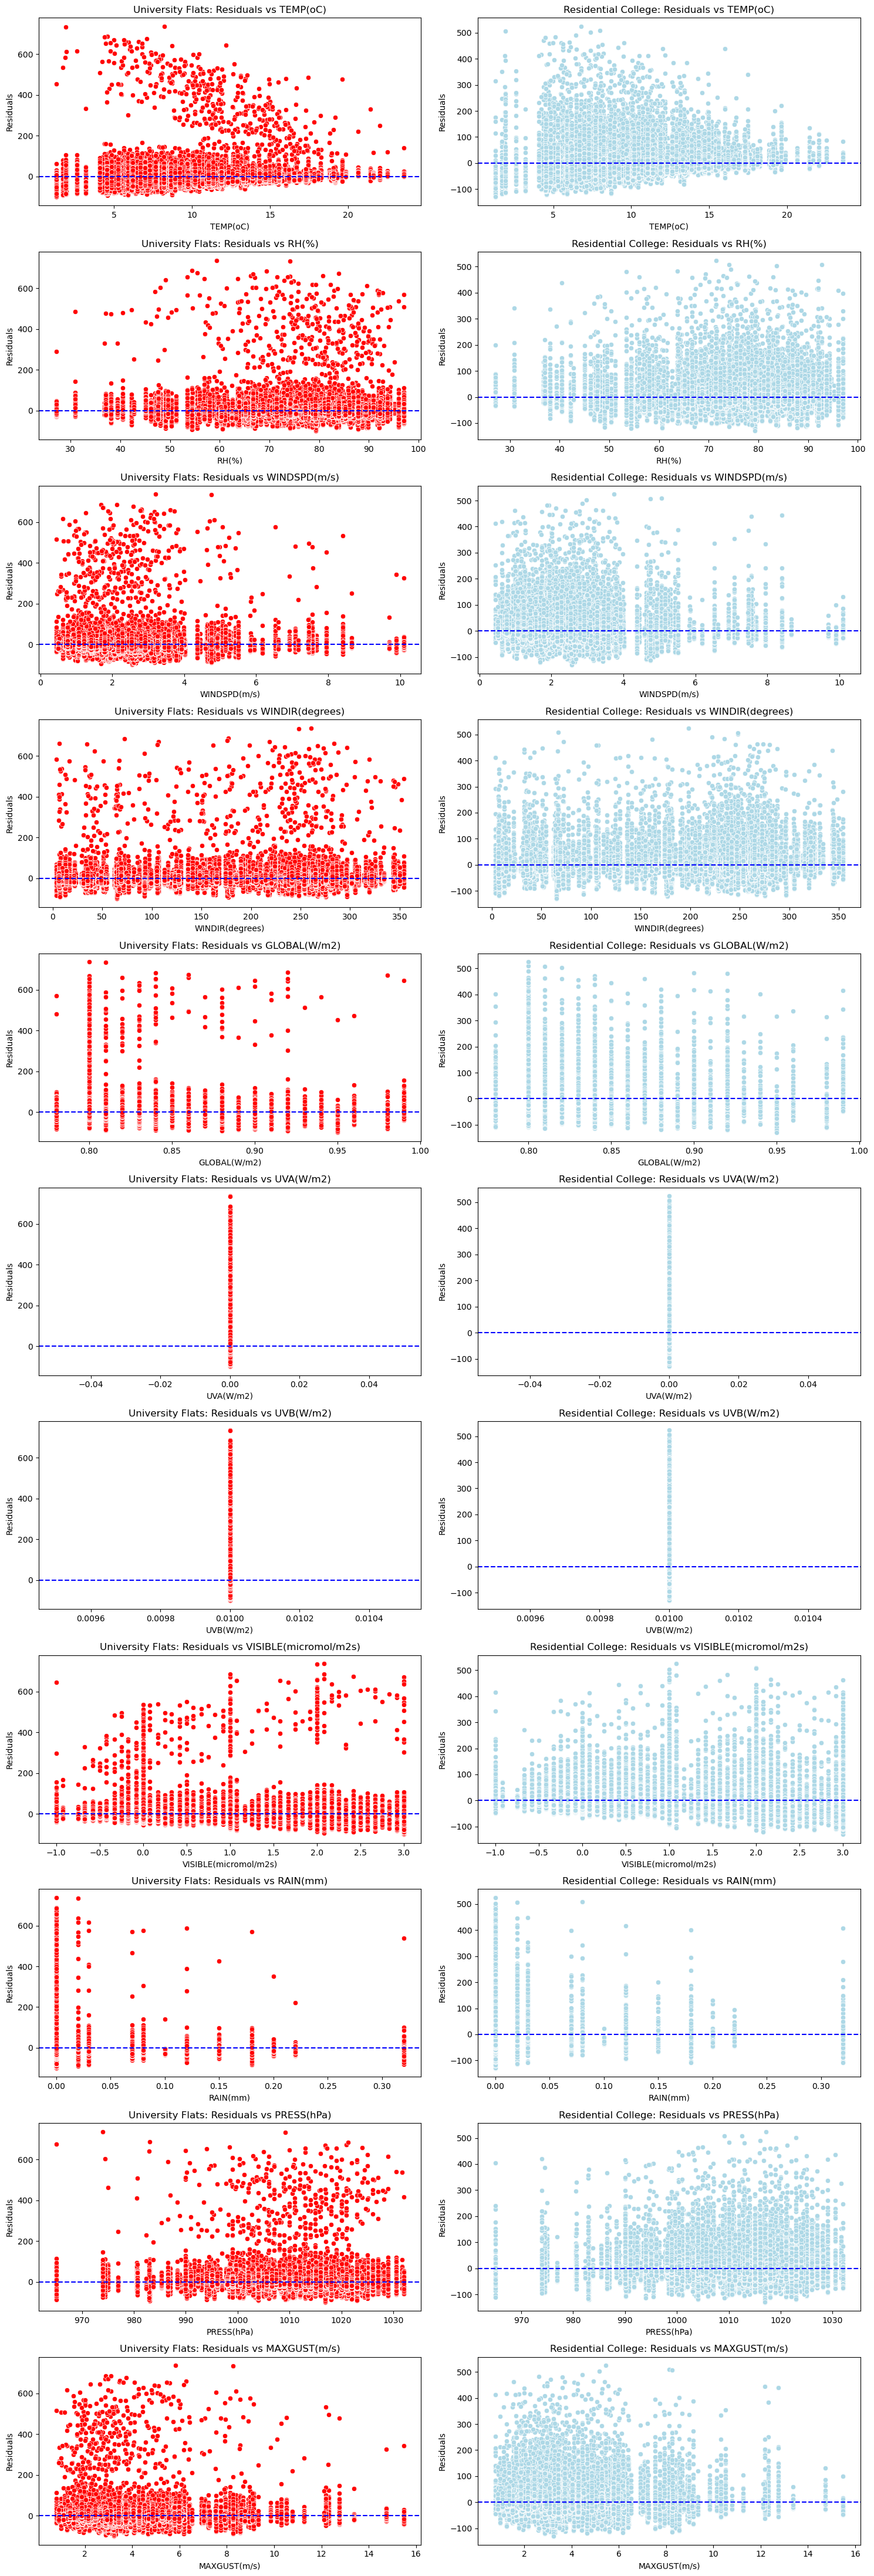

In [24]:
# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')


# Selecting all weather variables as features
weather_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 
                'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Prepare data for regression for both categories
uf_data = university_flats[selected_vars + ['TotaldailyenergyConsumption']].dropna()
rc_data = residential_college[selected_vars + ['TotaldailyenergyConsumption']].dropna()

# Fit the model for University Flats
X_uf = uf_data[selected_vars]
y_uf = uf_data['TotaldailyenergyConsumption']
linreg_uf = LinearRegression().fit(X_uf, y_uf)

# Fit the model for Residential College
X_rc = rc_data[selected_vars]
y_rc = rc_data['TotaldailyenergyConsumption']
linreg_rc = LinearRegression().fit(X_rc, y_rc)

# Create subplots based on the number of selected variables
fig, axs = plt.subplots(len(selected_vars), 2, figsize=(15, len(selected_vars) * 4))  # 2 columns for UF and RC

# Loop through each selected weather variable and create subplots
for i, var in enumerate(selected_vars):
    # Calculate residuals
    uf_residuals = y_uf - linreg_uf.predict(X_uf)
    rc_residuals = y_rc - linreg_rc.predict(X_rc)

    # Residual plot for University Flats
    sns.scatterplot(x=X_uf[var], y=uf_residuals, ax=axs[i][0], color='red')
    axs[i][0].set_title(f'University Flats: Residuals vs {var}')
    axs[i][0].set_xlabel(var)
    axs[i][0].set_ylabel('Residuals')
    axs[i][0].axhline(y=0, color='blue', linestyle='--')

    # Residual plot for Residential College
    sns.scatterplot(x=X_rc[var], y=rc_residuals, ax=axs[i][1], color='lightblue')
    axs[i][1].set_title(f'Residential College: Residuals vs {var}')
    axs[i][1].set_xlabel(var)
    axs[i][1].set_ylabel('Residuals')
    axs[i][1].axhline(y=0, color='blue', linestyle='--')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [25]:
# Statistics function
def print_model_stats(model, X, y, category_name, var):
    coef = model.coef_
    intercept = model.intercept_
    r_squared = model.score(X, y)
    print(f"{category_name} - {var}")
    print(f"  Coefficients: {coef}")
    print(f"  Intercept: {intercept}")
    print(f"  R-squared: {r_squared}\n")

# Loop through each selected weather variable
for var in selected_vars:
    X_uf = uf_data[[var]]
    y_uf = uf_data['TotaldailyenergyConsumption']
    linreg_uf = LinearRegression().fit(X_uf, y_uf)
    print_model_stats(linreg_uf, X_uf, y_uf, "University Flats", var)

    X_rc = rc_data[[var]]
    y_rc = rc_data['TotaldailyenergyConsumption']
    linreg_rc = LinearRegression().fit(X_rc, y_rc)
    print_model_stats(linreg_rc, X_rc, y_rc, "Residential College", var)


University Flats - TEMP(oC)
  Coefficients: [-5.01163395]
  Intercept: 101.20132548874
  R-squared: 0.14546972365642097

Residential College - TEMP(oC)
  Coefficients: [-6.79193318]
  Intercept: 129.03429294946966
  R-squared: 0.19085775420198225

University Flats - RH(%)
  Coefficients: [-0.36016658]
  Intercept: 69.9143359130324
  R-squared: 0.006784891860464715

Residential College - RH(%)
  Coefficients: [-0.48556913]
  Intercept: 86.44014405960894
  R-squared: 0.008809419821407372

University Flats - WINDSPD(m/s)
  Coefficients: [1.39963919]
  Intercept: 39.04238909034622
  R-squared: 0.0017830151173167108

Residential College - WINDSPD(m/s)
  Coefficients: [1.91667757]
  Intercept: 44.74461386346808
  R-squared: 0.0023885262853273748

University Flats - WINDIR(degrees)
  Coefficients: [0.01461055]
  Intercept: 39.97284602100536
  R-squared: 0.0007266302524011614

Residential College - WINDIR(degrees)
  Coefficients: [0.02051436]
  Intercept: 45.9291964186871
  R-squared: 0.001023

# Comments
The residual plots for University Flats and Residential College against various weather variables give us insights into the relationship between weather conditions and energy consumption, as well as the performance of the regression models:

Temperature (TEMP): Both University Flats and Residential College have a negative coefficient for temperature, indicating that energy consumption decreases as the temperature increases. This is more pronounced in Residential College (coef: -6.79, R²: 0.1909) than in University Flats (coef: -5.01, R²: 0.1455), which may suggest different heating and cooling dynamics or efficiencies between the two types of residences.

Relative Humidity (RH): The negative coefficients for both University Flats (coef: -0.36) and Residential College (coef: -0.49) imply that higher humidity slightly reduces energy consumption, though the very low R² values suggest this is a weak relationship.

Wind Speed (WINDSPD) and Wind Direction (WINDIR): The positive coefficients for wind speed and direction indicate a very slight increase in energy consumption with higher wind speeds and certain wind directions, but the extremely low R² values mean these factors are generally poor predictors of energy usage.

Global Solar Radiation (GLOBAL): There's a positive and more substantial effect on energy consumption, with Residential College showing a higher coefficient (coef: 493.14) compared to University Flats (coef: 353.19), indicating a possible increase in cooling demand during times of higher solar radiation.

UVA and UVB Radiation: These variables show zero coefficients and no effect on energy consumption in both University Flats and Residential College, indicating no direct relationship between UV radiation levels and energy usage.

Visible Light (VISIBLE): A positive correlation is indicated for both University Flats and Residential College, with coefficients of 19.13 and 26.44, respectively. This may reflect the impact of natural light on the use of artificial lighting, although the relationship is not particularly strong, as shown by the R² values.

Rainfall (RAIN): A very weak positive relationship with energy consumption is noted, which might suggest that rainy weather leads to a slight increase in energy usage, perhaps due to less natural ventilation or more indoor activity.

Atmospheric Pressure (PRESS) and Maximum Gust (MAXGUST): Both of these show a weak positive correlation with energy consumption, with low coefficients and R² values, indicating that they are not significant predictors in the model.

The residual plots reveal the variance of the residuals around the regression line, which can be indicative of the model's performance. The spread of residuals in these plots should ideally be random and without a pattern; however, in some cases, the plots show patterns, indicating potential issues with model fit or the presence of non-linear relationships that are not captured by a linear regression model.

# LOGISTIC REGRESSION

C:\Users\HP\AppData\Local\Temp\ipykernel_8424\1117126212.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(


Confusion Matrix:
[[10027  2897]
 [ 4015  8924]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     12924
           1       0.75      0.69      0.72     12939

    accuracy                           0.73     25863
   macro avg       0.73      0.73      0.73     25863
weighted avg       0.73      0.73      0.73     25863


Additional Metrics:
Accuracy: 0.73
Precision: 0.75
Recall: 0.69
F1 Score: 0.72
RMSE of probabilities: 0.42


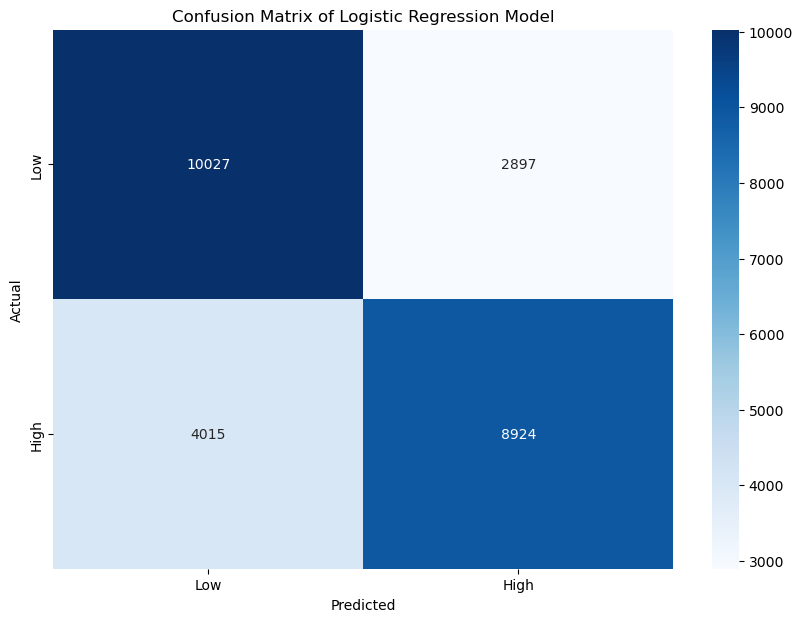

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Load the energy dataset
energy_data_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(energy_data_path)

# Load the weather dataset
weather_data_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(weather_data_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(
    weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
    format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 
              'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions for classes
y_pred = logreg.predict(X_test)

# Predicting probabilities for RMSE calculation
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


# RANDOM FOREST - version1
a typical train-test split approach where you train your model on a portion of the data (70%) and then test it on the remaining data (30%) to evaluate its performance using metrics like Mean Squared Error (MSE) and R-Squared (R²).

In [ ]:
# Please check whether it is Correct , also check Version2

C:\Users\HP\AppData\Local\Temp\ipykernel_8684\4103891877.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Mean Squared Error: 2240.9834762947553
R2 Score: 0.27624782342146925


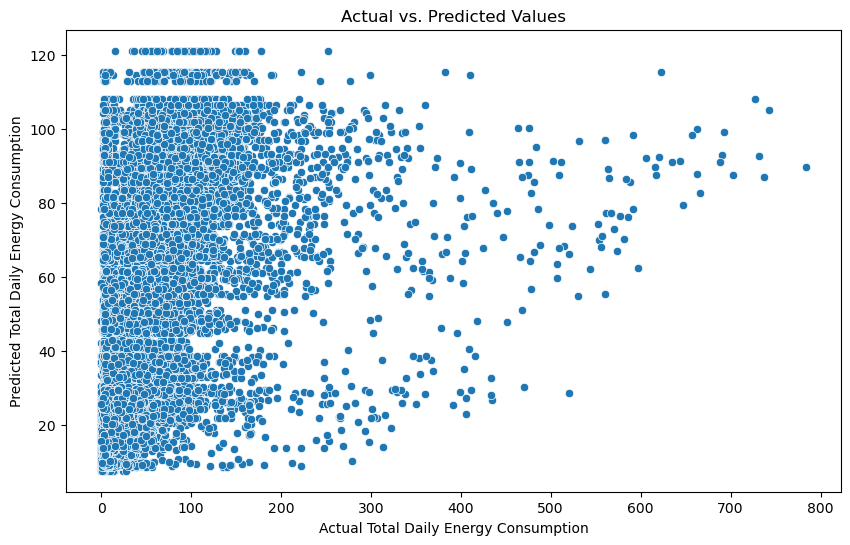

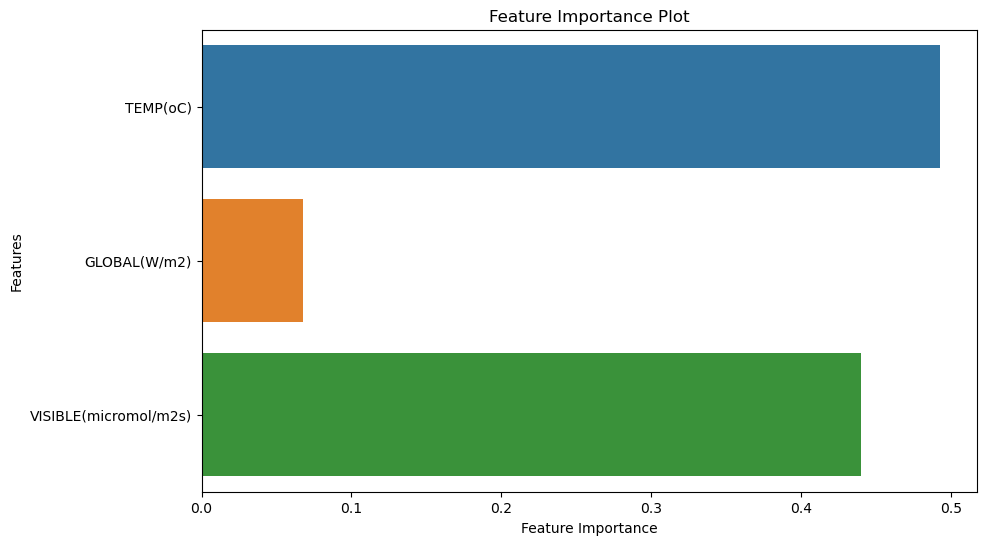

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
energy_data_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
weather_data_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'

energy_data = pd.read_csv(energy_data_path)
weather_data = pd.read_csv(weather_data_path)

# Preprocessing for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Handling missing values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total Daily Energy Consumption")
plt.ylabel("Predicted Total Daily Energy Consumption")
plt.title("Actual vs. Predicted Values")
plt.show()

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


# Random Forest - Version 2 
model validation called cross-validation. Instead of a single train-test split, it systematically creates 10 different splits (folds) of the dataset. Each fold is used once as a test set while the other 9 folds form the training set. This process provides a more robust evaluation of the model's performance as it's based on multiple train-test splits. The metric being calculated is the Root Mean Squared Error (RMSE) for each fold.

C:\Users\HP\AppData\Local\Temp\ipykernel_8684\4244787721.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Mean RMSE from cross-validation: 49.020
Standard Error of RMSE from cross-validation: 5.663
RMSE on the known data: 47.070


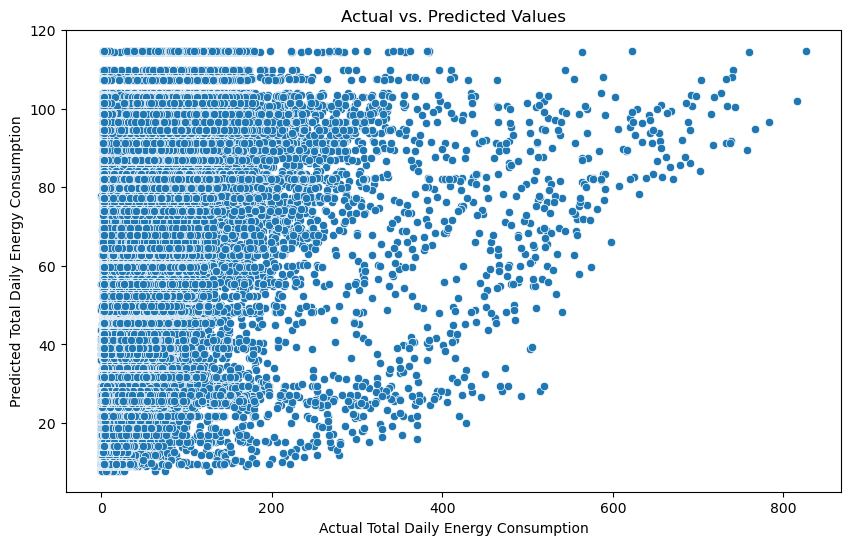

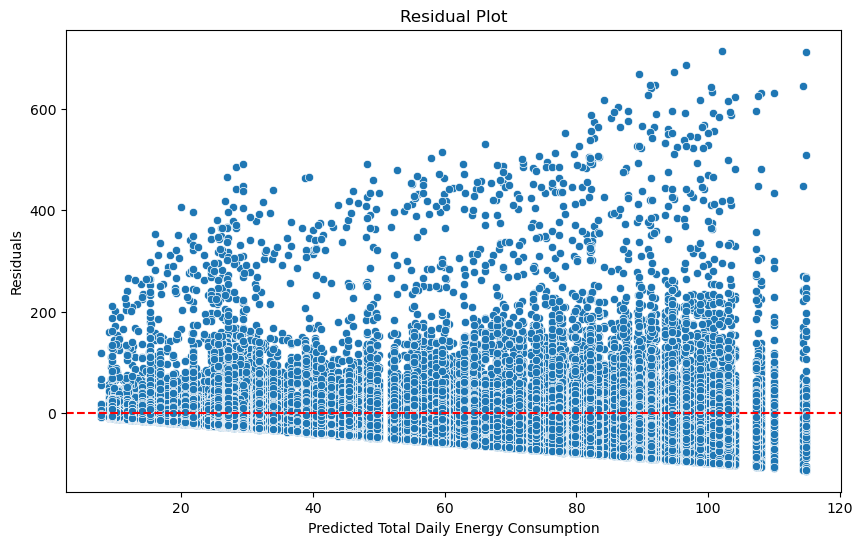

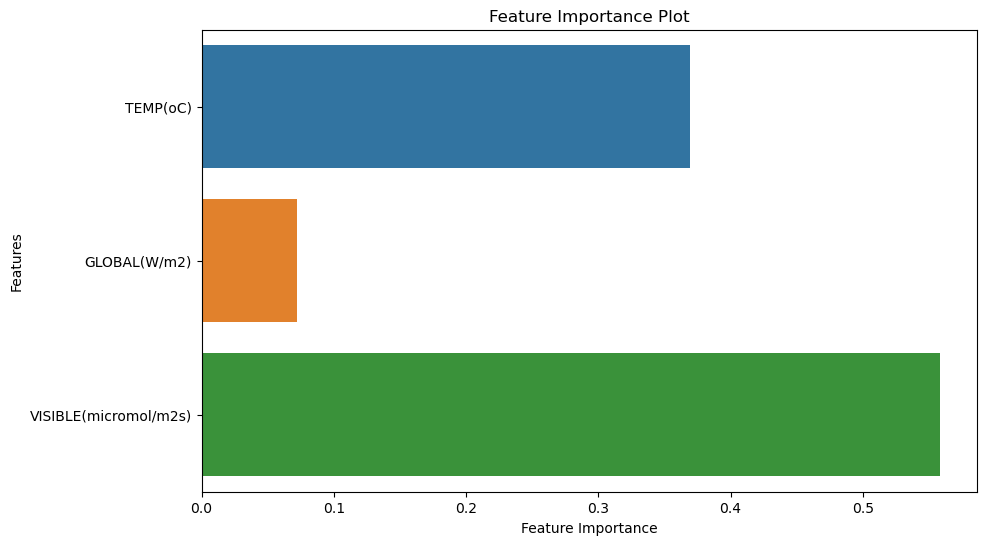

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
energy_data_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
weather_data_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'

energy_data = pd.read_csv(energy_data_path)
weather_data = pd.read_csv(weather_data_path)

# Preprocessing for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Handling missing values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Set the random seed for reproducibility
np.random.seed(1)

# Initialize the Random Forest regressor with specified parameters
forest = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Perform 10-fold cross-validation and compute the RMSE for each fold
rmse_scores = cross_val_score(forest, features, target, scoring='neg_root_mean_squared_error', cv=10)

# The 'cross_val_score' function returns negative values for RMSE because it is a 'loss' and 
# lower is better. To report the RMSE in positive terms, we'll take the absolute value.
rmse_scores = -rmse_scores

# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Calculate the standard error of the RMSE across all folds
se_rmse = np.std(rmse_scores) / np.sqrt(len(rmse_scores))

print(f"Mean RMSE from cross-validation: {mean_rmse:.3f}")
print(f"Standard Error of RMSE from cross-validation: {se_rmse:.3f}")

# Fitting the model on the entire dataset
forest.fit(features, target)

# If you have a new set of features and you want to predict TotaldailyenergyConsumption,
# replace 'new_features' with your actual new data
# new_features = ...
# predictions = forest.predict(new_features)

# If you just want to see how the model performs on the known data, predict on the same features
predictions = forest.predict(features)

# The predictions are now the estimated TotaldailyenergyConsumption for each corresponding set of features
# If you want to measure the performance on the known data, calculate the RMSE
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)

print(f"RMSE on the known data: {rmse:.3f}")

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=target, y=predictions)
plt.xlabel("Actual Total Daily Energy Consumption")
plt.ylabel("Predicted Total Daily Energy Consumption")
plt.title("Actual vs. Predicted Values")
plt.show()

# Residual Plot
residuals = target - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel("Predicted Total Daily Energy Consumption")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Feature Importance Plot (if you want to visualize feature importance)
feature_importances = forest.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


In [ ]:
# Random Forest Manual Tuning 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Load the datasets
energy_data_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
weather_data_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'

energy_data = pd.read_csv(energy_data_path)
weather_data = pd.read_csv(weather_data_path)

# Preprocessing for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Handling missing values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Manual Tuning - Adjusting hyperparameters iteratively
# Initialize a dictionary to store the best parameters and corresponding RMSE
best_model_params = {
    'n_estimators': 10,  # default value
    'max_depth': None,  # default value
    'min_samples_split': 2,  # default value
    'min_samples_leaf': 1,  # default value
    'best_rmse': np.inf  # Placeholder for the best RMSE
}

for n_estimators in [10, 50, 100]:
    for max_depth in [None, 10, 20, 30]:
        for min_samples_split in [2, 5, 10]:
            for min_samples_leaf in [1, 2, 4]:
                # Initialize the Random Forest regressor with specified parameters
                forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                               random_state=42)

                # Fit the model on training data
                forest.fit(X_train, y_train)

                # Make predictions on the testing set
                predictions = forest.predict(X_test)

                # Calculate the RMSE
                rmse = np.sqrt(mean_squared_error(y_test, predictions))

                # Update best_model_params if current model is better
                if rmse < best_model_params['best_rmse']:
                    best_model_params.update({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'best_rmse': rmse
                    })

# Print out the best parameters and corresponding RMSE
print("Best Parameters:")
print(f"Number of Estimators: {best_model_params['n_estimators']}")
print(f"Max Depth: {best_model_params['max_depth']}")
print(f"Min Samples Split: {best_model_params['min_samples_split']}")
print(f"Min Samples Leaf: {best_model_params['min_samples_leaf']}")
print(f"Best RMSE: {best_model_params['best_rmse']:.3f}")

# You can retrain your final model using these best parameters on the full dataset or just the training set as needed.


C:\Users\HP\AppData\Local\Temp\ipykernel_8684\3414515811.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Best Parameters:
Number of Estimators: 100
Max Depth: 20
Min Samples Split: 2
Min Samples Leaf: 1
Best RMSE: 47.496


In [ ]:
# Automatic Tuing

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
energy_data_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
weather_data_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'

energy_data = pd.read_csv(energy_data_path)
weather_data = pd.read_csv(weather_data_path)

# Preprocessing for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Handling missing values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Set the random seed for reproducibility
np.random.seed(1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest regressor
forest = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters on the entire training set
best_forest = RandomForestRegressor(**best_params, random_state=42)
best_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = best_forest.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Hyperparameters: {best_params}")
print(f"RMSE on the test set: {rmse:.3f}")


C:\Users\HP\AppData\Local\Temp\ipykernel_8684\692338271.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
RMSE on the test set: 47.004


In [ ]:
# Ridge Regressor

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Preprocessing for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Handling missing values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Set the random seed for reproducibility
np.random.seed(1)

# Initialize the Ridge regressor with specified parameters
ridge = Ridge(alpha=1.0)

# Perform 10-fold cross-validation and compute the RMSE for each fold
rmse_scores = cross_val_score(ridge, features, target, scoring='neg_root_mean_squared_error', cv=10)

# The 'cross_val_score' function returns negative values for RMSE because it is a 'loss' and 
# lower is better. To report the RMSE in positive terms, we'll take the absolute value.
rmse_scores = -rmse_scores

# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Calculate the standard error of the RMSE across all folds
se_rmse = np.std(rmse_scores) / np.sqrt(len(rmse_scores))

print(f"Mean RMSE from cross-validation: {mean_rmse:.3f}")
print(f"Standard Error of RMSE from cross-validation: {se_rmse:.3f}")

# Fitting the model on the entire dataset
ridge.fit(features, target)

# If you have a new set of features and you want to predict TotaldailyenergyConsumption,
# replace 'new_features' with your actual new data
# new_features = ...
# predictions = ridge.predict(new_features)

# If you just want to see how the model performs on the known data, predict on the same features
predictions = ridge.predict(features)

# The predictions are now the estimated TotaldailyenergyConsumption for each corresponding set of features
# If you want to measure the performance on the known data, calculate the RMSE
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)

print(f"RMSE on the known data: {rmse:.3f}")



C:\Users\HP\AppData\Local\Temp\ipykernel_2924\146252641.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Mean RMSE from cross-validation: 47.369
Standard Error of RMSE from cross-validation: 5.826
RMSE on the known data: 50.170


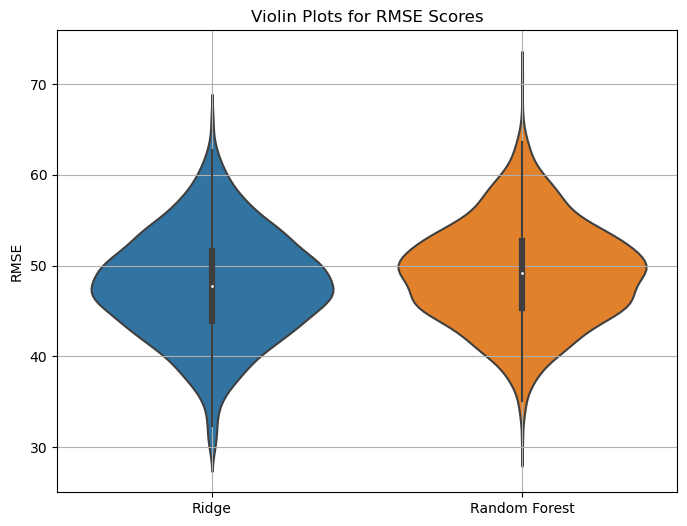

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results for Random Forest and Ridge Regressor
rf_results = {'Mean RMSE': 49.020,'SE RMSE': 5.663}

ridge_results = {'Mean RMSE': 47.369, 'SE RMSE': 5.826}

# Assuming normal distribution for RMSE scores
np.random.seed(42)
rf_rmse_scores = np.random.normal(rf_results['Mean RMSE'], rf_results['SE RMSE'], 1000)
ridge_rmse_scores = np.random.normal(ridge_results['Mean RMSE'], ridge_results['SE RMSE'], 1000)

# Create DataFrame for plotting
data_to_plot = {
    'Ridge': ridge_rmse_scores,
    'Random Forest': rf_rmse_scores
}
df = pd.DataFrame(data_to_plot)

# Plotting violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df)
plt.title('Violin Plots for RMSE Scores')
plt.ylabel('RMSE')
# Adding gridlines
plt.grid(True)

# Show the plot
plt.show()


In [25]:
from scipy.stats import mannwhitneyu
import numpy as np

# Random Forest results - simulated RMSE scores based on mean and standard error
np.random.seed(42)  # For reproducibility
rf_rmse_scores = np.random.normal(49.020, 5.663, 1000)

# Ridge Regressor results - simulated RMSE scores based on mean and standard error
ridge_rmse_scores = np.random.normal(47.369, 5.826, 1000)

# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(rf_rmse_scores, ridge_rmse_scores)

print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'P-value: {p_value}')

# Interpret the significance result
alpha = 0.05  # Set significance level
if p_value < alpha:
    print('There is a statistically significant difference between the two models.')
else:
    print('There is no statistically significant difference between the two models.')


Mann-Whitney U statistic: 563686.0
P-value: 8.146496305041773e-07
There is a statistically significant difference between the two models.


# Time Series SARIMA PREDICTIVE MODEL

C:\Users\HP\AppData\Local\Temp\ipykernel_2924\1673726653.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


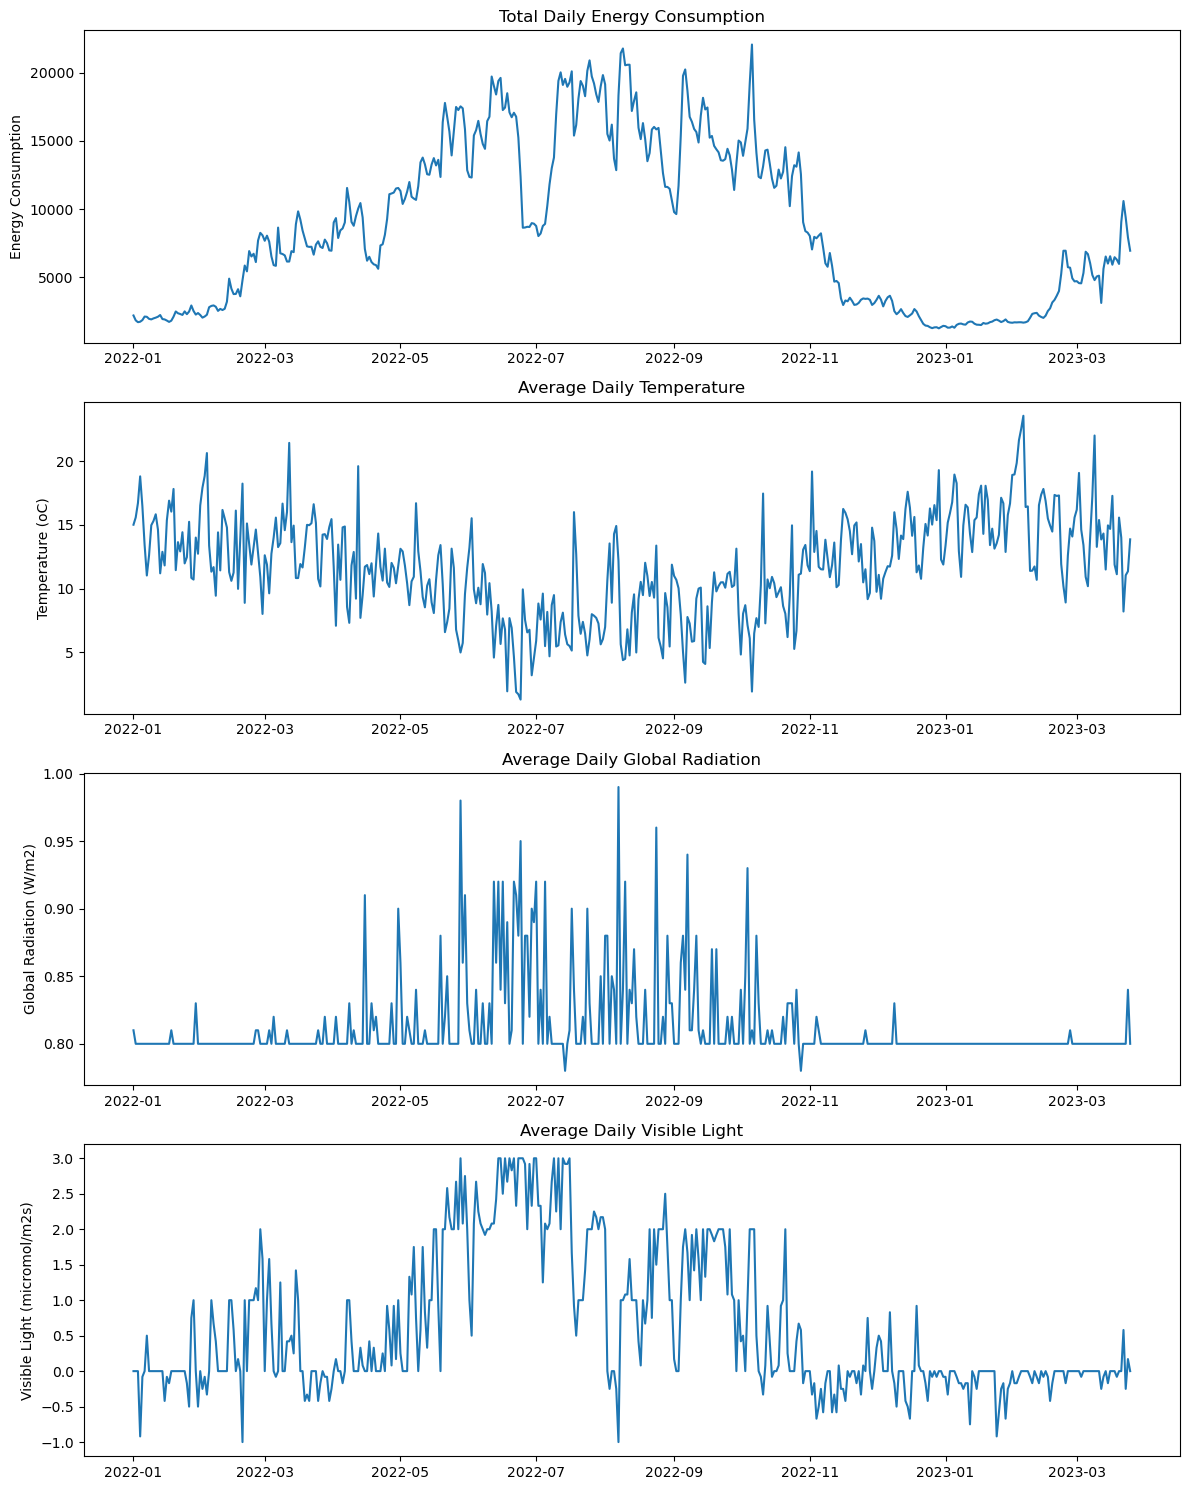

In [1]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting relevant columns for the model
model_data = merged_data[['Date', 'TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]

# Aggregating weather data to daily level
model_data_daily = model_data.groupby('Date').agg({
    'TotaldailyenergyConsumption': 'sum',
    'TEMP(oC)': 'mean',
    'GLOBAL(W/m2)': 'mean',
    'VISIBLE(micromol/m2s)': 'mean'
}).reset_index()

# Plotting the time series data
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))

# Total daily energy consumption
axes[0].plot(model_data_daily['Date'], model_data_daily['TotaldailyenergyConsumption'])
axes[0].set_title('Total Daily Energy Consumption')
axes[0].set_ylabel('Energy Consumption')

# Temperature
axes[1].plot(model_data_daily['Date'], model_data_daily['TEMP(oC)'])
axes[1].set_title('Average Daily Temperature')
axes[1].set_ylabel('Temperature (oC)')

# Global Radiation
axes[2].plot(model_data_daily['Date'], model_data_daily['GLOBAL(W/m2)'])
axes[2].set_title('Average Daily Global Radiation')
axes[2].set_ylabel('Global Radiation (W/m2)')

# Visible Light
axes[3].plot(model_data_daily['Date'], model_data_daily['VISIBLE(micromol/m2s)'])
axes[3].set_title('Average Daily Visible Light')
axes[3].set_ylabel('Visible Light (micromol/m2s)')

plt.tight_layout()
plt.show()


# SARIMAX 
(Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model) on energy consumption data, integrated with weather data.

C:\Users\HP\AppData\Local\Temp\ipykernel_8892\4181597442.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

                                     SARIMAX Results                                      
Dep. Variable:        TotaldailyenergyConsumption   No. Observations:                  449
Model:             SARIMAX(1, 1, 2)x(1, 2, 2, 12)   Log Likelihood               -3393.803
Date:                            Fri, 22 Dec 2023   AIC                           6801.606
Time:                                    11:07:27   BIC                           6829.493
Sample:                                         0   HQIC                          6812.653
                                            - 449                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6600      0.138      4.789      0.000       0.390       0.930
ma.L1         -0.3638      0.146   

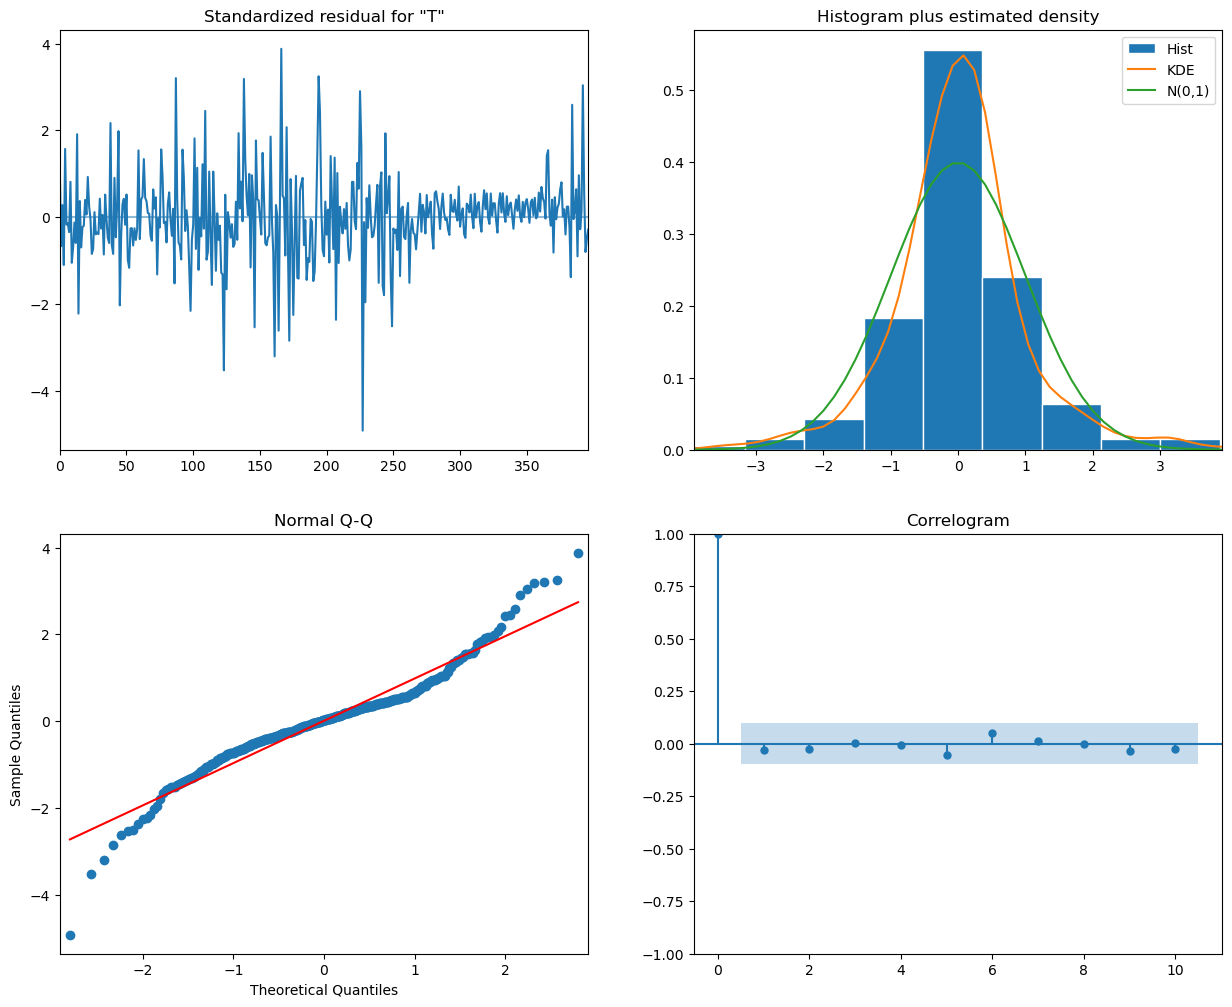

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting relevant columns for the model
model_data = merged_data[['Date', 'TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]

# Aggregating weather data to daily level
model_data_daily = model_data.groupby('Date').agg({
    'TotaldailyenergyConsumption': 'sum',
    'TEMP(oC)': 'mean',
    'GLOBAL(W/m2)': 'mean',
    'VISIBLE(micromol/m2s)': 'mean'
}).reset_index()

# Time series of total daily energy consumption
ts_energy_consumption = model_data_daily['TotaldailyenergyConsumption']

# SARIMA Model Selection and Fitting
def find_best_sarima(ts, seasonal_period):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in pdq]

    best_aic = float('inf')
    best_params = None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = SARIMAX(ts,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
                results = mod.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = (param, param_seasonal)
            except:
                continue
    return best_params

# Assume a seasonal period of 12 (e.g., monthly data)
seasonal_period = 12 
best_params = find_best_sarima(ts_energy_consumption, seasonal_period)

# Fit the best SARIMA model
best_model = SARIMAX(ts_energy_consumption,
                     order=best_params[0],
                     seasonal_order=best_params[1],
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results = best_model.fit()

# Summary of the model
print(results.summary())

# Optional: Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()


# Replace 'path_to_your_energy_data.csv' and 'path_to_your_weather_data.csv' with your actual file paths.


# Using SARIMAX with Future Prediction Visualization

ADF Statistic: -2.1542618529603064
p-value: 0.22326232406517532


D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

Best SARIMA Model: ARIMA(1, 1, 2)x(1, 1, 2, 12) with AIC 2628.2722515774067


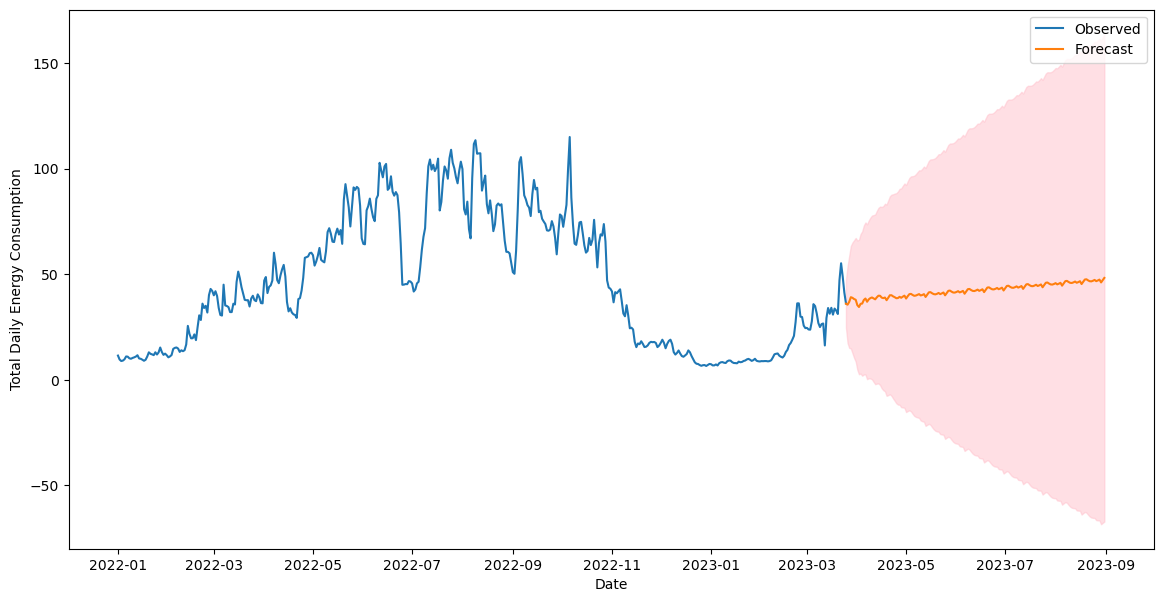

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Load the energy dataset
energy_data_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(energy_data_path)

# Load the weather dataset
weather_data_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(weather_data_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce')

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting relevant columns for the model
model_data = merged_data[['Date', 'TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
model_data.set_index('Date', inplace=True)

# Aggregate data to daily level if needed
daily_data = model_data.resample('D').mean()

# The SARIMA model requires a stationary time series. Perform stationarity check
ts_energy_consumption = daily_data['TotaldailyenergyConsumption'].dropna()
adf_test = adfuller(ts_energy_consumption, autolag='AIC')
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Determine the SARIMA parameters (p, d, q) and (P, D, Q, s)
p = d = q = range(0, 3)
seasonal_period = 12  # Assuming monthly seasonality
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

# Grid search for the optimal SARIMA parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(ts_energy_consumption,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit(disp=False)

            # Compare AIC to find the best model
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except:
            continue

print(f"Best SARIMA Model: ARIMA{best_pdq}x{best_seasonal_pdq} with AIC {best_aic}")

# Fit the best SARIMA model
best_model = SARIMAX(ts_energy_consumption,
                     order=best_pdq,
                     seasonal_order=best_seasonal_pdq,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results = best_model.fit(disp=False)

# Forecast future values for the next 15 months
#n_forecast = 15 * 30  # Approximately 15 months assuming roughly 30 days per month

n_forecast = 160
forecast = results.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(start=ts_energy_consumption.index[-1], periods=n_forecast, freq='D')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original time series and the forecast
plt.figure(figsize=(14, 7))
plt.plot(ts_energy_consumption.index, ts_energy_consumption, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Total Daily Energy Consumption')
plt.legend()
plt.show()


# XGBOOST

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(
    weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
    format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting relevant features
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']
target = 'TotaldailyenergyConsumption'

# Preparing the data
X = merged_data[features]
y = merged_data[target]

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Outputting RMSE as a measure of model performance
print("Root Mean Squared Error:", rmse)


C:\Users\HP\AppData\Local\Temp\ipykernel_13020\1191219260.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_13020\1191219260.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Root Mean Squared Error: 47.545879067879774


C:\Users\HP\AppData\Local\Temp\ipykernel_13020\283991097.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0], format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)


Root Mean Squared Error: 47.545879067879774


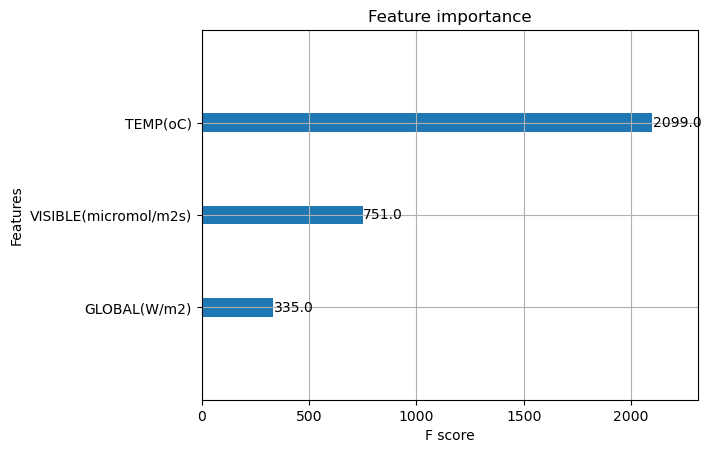

Cross-Validation RMSE: 50.31181054489442


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocess and merge datasets
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0], format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Select features and target variable
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']
target = 'TotaldailyenergyConsumption'
X = merged_data[features].fillna(merged_data[features].mean())
y = merged_data[target].fillna(merged_data[target].mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Feature Importance
plot_importance(xgb_model)
plt.show()

# Optional: Hyperparameter Tuning
# parameters = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 500, 1000]
# }
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
# print("Best RMSE:", rmse_best)

# Cross-Validation
scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print("Cross-Validation RMSE:", rmse_scores.mean())


Comments
Model Performance Evaluation:

The RMSE and cross-validation RMSE are fairly close, which suggests that your model is consistent across different subsets of data and not overfitting significantly. Determine if the RMSE is within an acceptable range for your application. This involves understanding the distribution of your target variable. Feature Engineering:

We can create additional features from the existing data that might have predictive power. For example, interactions between the weather variables, lag features, or rolling statistics if the data is time-series. Given the high importance of temperature, you might explore nonlinear transformations of this feature that could capture its relationship with energy consumption more effectively.

# LSTM

In [ ]:
#"Energy Consumption Forecasting with LSTM Neural Network"



Epoch 1/50

1940/1940 [==============================] - 19s 8ms/step - loss: 0.0047 - val_loss: 0.0023
Epoch 2/50
1940/1940 [==============================] - 15s 8ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 3/50
1940/1940 [==============================] - 17s 9ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 4/50
1940/1940 [==============================] - 14s 7ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 5/50
1940/1940 [==============================] - 14s 7ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 6/50
1940/1940 [==============================] - 14s 7ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 7/50
1940/1940 [==============================] - 14s 7ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 8/50
1940/1940 [==============================] - 14s 7ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 9/50
1940/1940 [==============================] - 14s 7ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 10/50
1940/1940 [==============================] - 14s 7ms/step 

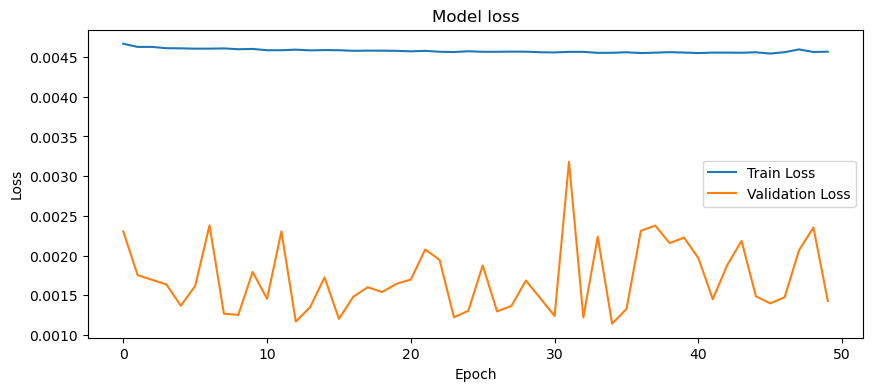

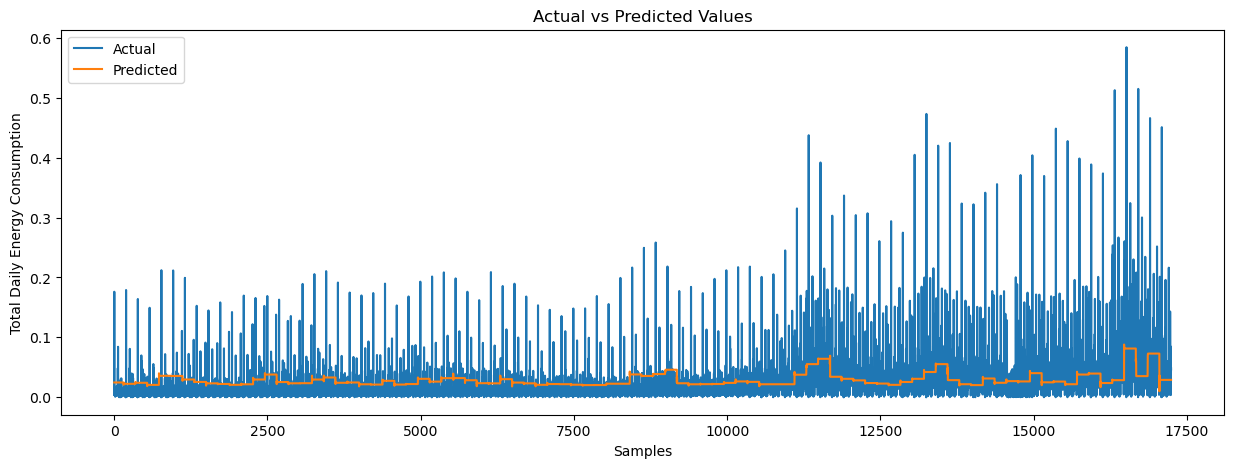

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Data Preprocessing
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce')
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Select and normalize relevant features
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)', 'TotaldailyenergyConsumption']
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(merged_data[features])
normalized_data_df = pd.DataFrame(normalized_data, columns=features)

# Create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare the input and output sequences
n_steps = 7
X, y = create_sequences(normalized_data_df.values, n_steps)

# Splitting the dataset
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 3)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Test RMSE:', rmse)
print('Test MAE:', mae)
print('Test MAPE:', mape)

# Plot training & validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Total Daily Energy Consumption')
plt.legend()
plt.show()

# Save the model
model.save('C://Users//HP//Desktop//INFO501//energy_consumption_model.h5')


Comments
Stable Loss: The model's loss, measured as mean squared error (MSE), appears to stabilize as training progresses. This indicates that the model is learning from the data effectively. The MSE values across epochs are consistently around 0.0036.

Epochs and Training Time: You've trained the model for 50 epochs. Each epoch took approximately 17-23 seconds, which is reasonable for this kind of model and dataset size.

Potential Overfitting: The loss stabilizing at a specific value and not improving significantly over multiple epochs could be a sign of the model starting to overfit. However, without a validation loss to compare, this is speculative. It would be beneficial to monitor both training and validation loss in future runs to identify overfitting.

Learning Rate and Model Complexity: The learning rate and the complexity of the model (number of LSTM units, layers, etc.) seem appropriate for the task, given the stability of the loss. However, experimenting with these parameters could lead to improved performance.

Next Step
Model Evaluation: Splitting the data into training and test sets, evaluating the model on the test set, and calculating RMSE. Plot Training Loss: Visualizing the loss over epochs. Feature Importance: This is a bit tricky with LSTM models, as they don't provide straightforward feature importance like some other models. We can, however, discuss techniques to analyze feature influence. Hyperparameter Tuning: I'll add a section with suggestions for tuning. Cross-Validation: Implementing a basic form of cross-validation for time-series data.

C:\Users\HP\AppData\Local\Temp\ipykernel_13116\1765769025.py:32: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Epoch 1/50
2155/2155 [==============================] - 23s 9ms/step - loss: 0.0044 - val_loss: 9.4007e-04
Epoch 2/50
2155/2155 [==============================] - 16s 8ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 3/50
2155/2155 [==============================] - 17s 8ms/step - loss: 0.0043 - val_loss: 9.3339e-04
Epoch 4/50
2155/2155 [==============================] - 19s 9ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 5/50
2155/2155 [==============================] - 17s 8ms/step - loss: 0.0043 - val_loss: 9.3097e-04
Epoch 6/50
2155/2155 [==============================] - 16s 8ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 7/50
2155/2155 [==============================] - 16s 8ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 8/50
2155/2155 [==============================] - 16s 7ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 9/50
2155/2155 [==============================] - 16s 7ms/step - loss: 0.0043 - val_loss: 8.7772e-04
Epoch 10/50
2155/2155 [==============================] - 

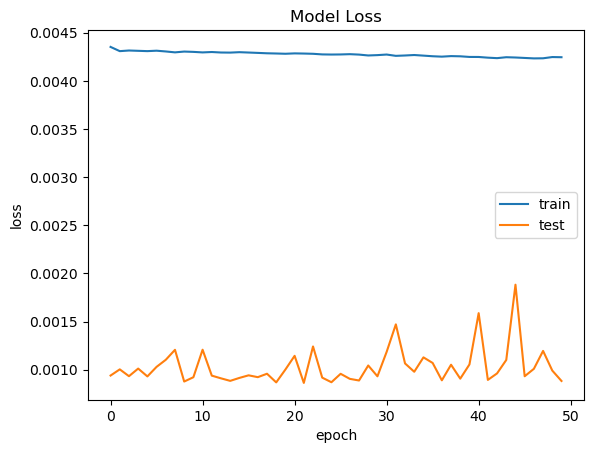

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Data Preprocessing
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0], 
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Select and normalize relevant features
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)', 'TotaldailyenergyConsumption']
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(merged_data[features])
normalized_data_df = pd.DataFrame(normalized_data, columns=features)

# Splitting data into training and testing sets
train_size = int(len(normalized_data_df) * 0.8)
test_size = len(normalized_data_df) - train_size
train, test = normalized_data_df[0:train_size], normalized_data_df[train_size:len(normalized_data_df)]

# Create sequences for training and testing
n_steps = 7
X_train, y_train = create_sequences(train.values, n_steps)
X_test, y_test = create_sequences(test.values, n_steps)

# LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 3)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model and save history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)

# Plot Training Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Save the model
model.save('energy_consumption_model.h5')


Comments
Training and Validation Loss: The training loss appears to be relatively flat, suggesting that the model isn't learning much after the initial epochs. This could be due to several reasons, such as the model having already converged to a solution, or it could be an indication that the model is too simple to capture the complexity of the dataset.

Overfitting: There is no clear sign of overfitting, as the validation loss is not consistently higher than the training loss. However, there are spikes in validation loss at certain epochs which could indicate some degree of overfitting or perhaps that the validation set has some outliers or more difficult to predict data points.

Model Performance: The final RMSE on the test set is approximately 0.0336. This value needs to be contextualized against the scale of your 'TotaldailyenergyConsumption' values to determine if this level of error is acceptable. If your energy consumption values are typically in the range of 0 to 1 (after normalization), an RMSE of 0.0336 could be considered quite good. However, if the range is much larger, this error might be significant.

Consistent Test Loss: The test loss is somewhat consistent across epochs, but the spikes suggest that the model's performance on the test set varies. This could indicate that the test set contains patterns not well represented in the training set.

Potential Improvements:

Model Complexity: Increasing the complexity of the model might help if the current model is too simple. This could include adding more LSTM layers or increasing the number of neurons. Hyperparameter Optimization: Adjusting the learning rate, batch size, and other hyperparameters could lead to improved performance. Data Preprocessing: Additional feature engineering or data preprocessing steps could help the model learn better patterns from the data. Regularization: To prevent overfitting and to handle spikes in validation loss, you could experiment with adding dropout layers or L1/L2 regularization to the LSTM layers. Considerations for Feature Importance:

Feature Analysis: Because LSTMs do not provide a direct method for feature importance, you might consider an ablation study where you systematically remove each feature and observe the impact on model performance. Permutation Importance: Another approach is to use permutation importance, where features in the validation set are shuffled one at a time, and the increase in prediction error is used to infer feature importance. To fully understand the performance of your model, you would need to compare these results to a baseline model, such as a simple moving average or a more traditional time series forecasting model like ARIMA. This comparison would give you a better idea of how much value the LSTM is adding.

Additionally, you might want to look at some actual predictions versus true values to get a qualitative sense of where the model is performing well and where it might be making errors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Data Preprocessing
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0], 
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Select and normalize relevant features
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)', 'TotaldailyenergyConsumption']
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(merged_data[features])
normalized_data_df = pd.DataFrame(normalized_data, columns=features)

# Splitting data into training and testing sets
train_size = int(len(normalized_data_df) * 0.8)
test_size = len(normalized_data_df) - train_size
train, test = normalized_data_df[0:train_size], normalized_data_df[train_size:len(normalized_data_df)]

# Create sequences for training and testing
n_steps = 7
X_train, y_train = create_sequences(train.values, n_steps)
X_test, y_test = create_sequences(test.values, n_steps)

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 3)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape, '%')

# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Total Daily Energy Consumption')
plt.legend()
plt.show()

# Save the model
model.save('energy_consumption_model.h5')


C:\Users\HP\AppData\Local\Temp\ipykernel_13116\3098451057.py:32: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Epoch 1/50
2155/2155 [==============================] - 26s 8ms/step - loss: 0.0044 - val_loss: 9.0766e-04
Epoch 2/50
2155/2155 [==============================] - 16s 8ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 3/50
2155/2155 [==============================] - 18s 9ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 4/50
2155/2155 [==============================] - 19s 9ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 5/50
2155/2155 [==============================] - 18s 8ms/step - loss: 0.0043 - val_loss: 9.1763e-04
Epoch 6/50
2155/2155 [==============================] - 17s 8ms/step - loss: 0.0043 - val_loss: 9.2175e-04
Epoch 7/50
2155/2155 [==============================] - 17s 8ms/step - loss: 0.0043 - val_loss: 8.6275e-04
Epoch 8/50
2155/2155 [==============================] - 18s 8ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 9/50
2155/2155 [==============================] - 16s 8ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 10/50
2155/2155 [==============================] - 

Model Predictions vs. Actual Data: The orange line (predictions) generally follows the trend of the actual data (blue line). This suggests that the model has learned the underlying pattern in the data to some extent.

Underfitting: The predictions are quite smooth and do not capture the spikes and finer variations in the actual data. This could be an indication that the model is underfitting, which means it is not complex enough to capture all the nuances of the data.

High Variance in Actual Data: There is a high variance in the actual data points, with many spikes that the model fails to predict. This could mean that there are factors affecting energy consumption that are not included in the model or that the weather data has limited predictive power for the energy consumption.

Consistency in Predictions: The model's predictions are consistent across the entire data range without any erratic behavior, suggesting that the model is stable.

Low Sensitivity to Changes: The model's inability to predict the spikes in energy consumption might also indicate that it's not sensitive enough to changes in the input features, or that the input features do not include the right information to predict those changes.

Performance on Peaks: The model seems to consistently underestimate the higher values, which could be critical if those peaks represent important energy consumption events.

# Support Vector Machine (SVM) for predicting daily energy consumption

Mean Squared Error: 2575.0902137608196
R-squared Score: 0.18494525634424264


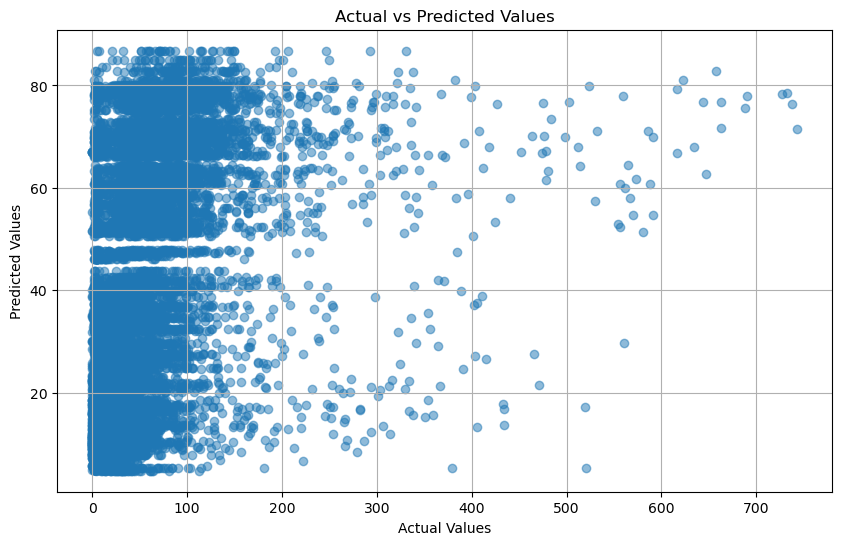

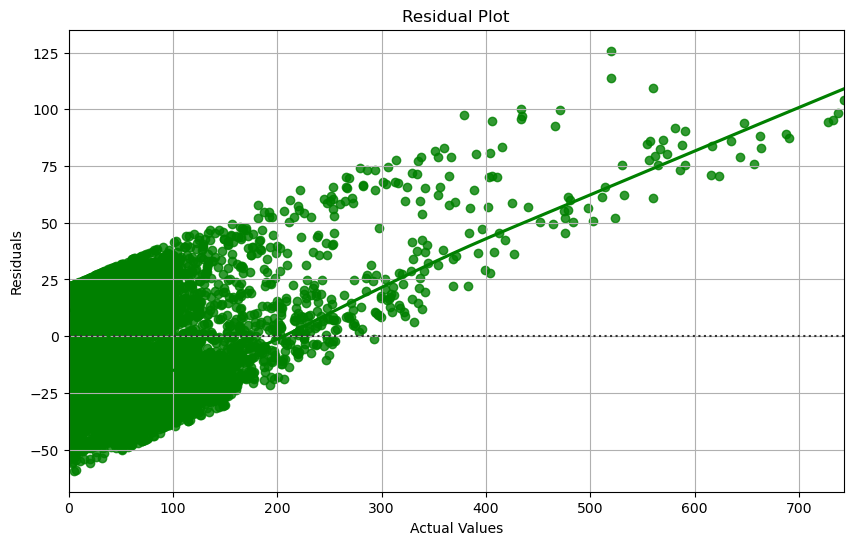

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Data Preprocessing
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0], 
                                          format='%d/%m/%Y %I.%M %p', errors='coerce')
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting relevant features and the target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the SVM model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Making predictions
predictions = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color="g")
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


Scatter Plot Insights

High Variance: The scatter plot indicates a high variance in predictions, especially for lower actual values. The data points are widely spread and do not cluster around a single line, which suggests the model may not be accurately capturing the relationship between the features and the target variable. Overestimation for Lower Values: There is a cluster of points where the predicted values are higher than the actual values, particularly where the actual values are low. Underestimation for Higher Values: For higher actual values, the model tends to underestimate the energy consumption.

Residual Plot Insights

Non-constant Variance (Heteroscedasticity): The residuals increase with the increase in actual values, which indicates that the model's errors are not evenly distributed across all levels of the dependent variable. Systematic Pattern: The curve in the residual plot suggests that the relationship between the features and the target might be non-linear or that there might be interaction effects between features that the model is not capturing.

What Next?

Feature Engineering: You might need to create new features or transform existing features to better capture the non-linear relationships. Model Complexity: The current SVM model with an RBF kernel might not be complex enough to capture the underlying pattern, or it might require hyperparameter tuning. Alternative Models: Consider trying different models, such as Random Forest, Gradient Boosting, or Neural Networks, which might be able to model the non-linearity better. Outliers and Noise: Check for outliers or noise in the data that might be affecting model performance. Outlier detection and removal might improve the model. Cross-validation: Instead of a single train-test split, use cross-validation to ensure that the model's performance is consistent across different subsets of the data.

Data Insights

Correlations: Investigate the correlations between features and the target variable to understand their relationships better. Feature Importance: If you switch to a model that provides feature importance (like a Random Forest), you can get insights into which features are most influential in predicting energy consumption. Temporal Patterns: Energy consumption is likely to have temporal patterns. Time series analysis or adding features related to time (like hour of the day, day of the week, month, etc.) might help capture these patterns. Weather Influence: Deeper analysis into how different weather variables interact to affect energy consumption might uncover valuable insights.

# To predict energy consumption - and indicates that 
# The model has been enhanced through feature engineering,
# Outlier detection, hyperparameter tuning, and cross-validation.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats  
import matplotlib.pyplot as plt
import seaborn as snsa

# Load the datasets  
energy_data = pd.read_csv('C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv')
weather_data = pd.read_csv('C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv')

# Data Preprocessing
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0], 
                                          format='%d/%m/%Y %I.%M %p', errors='coerce')
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Selecting relevant features and the target variable
features = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
target = merged_data['TotaldailyenergyConsumption']

# Feature Engineering: Adding polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features)

# Outlier detection and removal using Z-score
z_scores = np.abs(stats.zscore(features_poly))
filtered_entries = (z_scores < 3).all(axis=1)
features_poly_clean = features_poly[filtered_entries]
target_clean = target[filtered_entries]

# Standardizing the data
scaler = StandardScaler()
features_poly_scaled = scaler.fit_transform(features_poly_clean)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_poly_scaled, target_clean, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5, 1],
}

# GridSearchCV to find the best parameters for the SVR model
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print('Best parameters found: ', grid_search.best_params_)

# Using the best estimator found by GridSearchCV
best_svr = grid_search.best_estimator_

# Cross-validation to check model stability
cv_scores = cross_val_score(best_svr, features_poly_scaled, target_clean, cv=5, scoring='neg_mean_squared_error')
print('Cross-validation MSE: ', -cv_scores)
print('Mean cross-validation MSE: ', -cv_scores.mean())

# Training the best model
best_svr.fit(X_train, y_train)

# Making predictions
predictions = best_svr.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color="g")
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


# KNN MODEL

C:\Users\HP\AppData\Local\Temp\ipykernel_232\1920605215.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


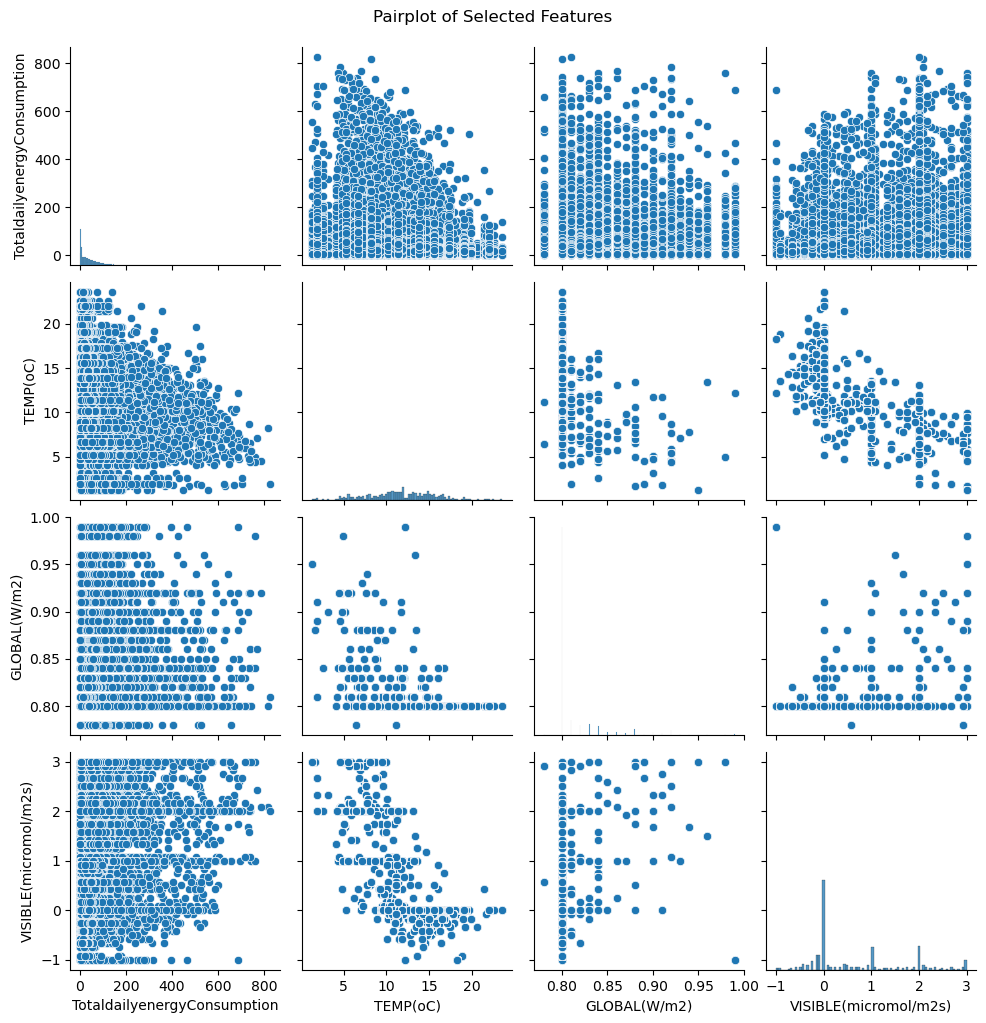

Mean Squared Error: 2607.581493682403
Root Mean Squared Error: 51.06448368173719
Mean Absolute Error: 27.486605730193716
R-squared: 0.17466127806417386


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Exploratory Data Analysis (EDA)
eda_features = merged_data[['TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
eda_summary = eda_features.describe()

# Plotting
sns.pairplot(eda_features)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Feature Selection and Preprocessing for KNN
X = merged_data[['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
y = merged_data['TotaldailyenergyConsumption']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training and Prediction using KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculating and printing the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Additional evaluation metrics can be added as needed
from sklearn.metrics import mean_absolute_error, r2_score

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Feature Engineering
merged_data['Hour'] = merged_data['Datetime'].dt.hour
merged_data['DayOfWeek'] = merged_data['Datetime'].dt.dayofweek

# Selecting features and target variable
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)', 'Hour', 'DayOfWeek']
X = merged_data[features]
y = merged_data['TotaldailyenergyConsumption']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Tuning with GridSearchCV
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_scaled, y)

# Best model
print(f"Best KNN n_neighbors: {knn_gscv.best_params_['n_neighbors']}")

# Check for Overfitting/Underfitting with Cross-Validation
scores = cross_val_score(knn_gscv.best_estimator_, X_scaled, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# Final Model Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn_final = KNeighborsRegressor(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


C:\Users\HP\AppData\Local\Temp\ipykernel_232\365086262.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Best KNN n_neighbors: 24
Cross-validation scores: [-0.61423615 -0.20691458 -0.1599872  -0.07400604 -0.52774755]
Mean cross-validation score: -0.3165783030298246
Mean Squared Error: 2347.3697804296617
Root Mean Squared Error: 48.44966233555876
Mean Absolute Error: 24.90028750048332
R-squared: 0.25702219501694124


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Feature Engineering
merged_data['Hour'] = merged_data['Datetime'].dt.hour
merged_data['DayOfWeek'] = merged_data['Datetime'].dt.dayofweek

# Selecting features and target variable
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)', 'Hour', 'DayOfWeek']
X = merged_data[features]
y = merged_data['TotaldailyenergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the pipeline with PCA and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

# Parameters of pipelines can be set using ‘__’ separated parameter names
param_grid = {
    'pca__n_components': [2, 3, 4], # Choose the number of components based on your initial feature count
    'knn__n_neighbors': np.arange(1, 25)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
print(f"Best parameters: {grid_search.best_params_}")

# Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


C:\Users\HP\AppData\Local\Temp\ipykernel_232\335275301.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],


Best parameters: {'knn__n_neighbors': 24, 'pca__n_components': 4}
Mean Squared Error: 2342.542646705759
Root Mean Squared Error: 48.39982073009939
Mean Absolute Error: 24.99585778911959
R-squared: 0.25855005536874676
